# Monster.com WebScraping

# Bay Area

### Data analyst, only full time, Palo Alto, 50 miles radius

In [3]:
import requests
from bs4 import BeautifulSoup

sf_data_analyst_url = 'https://www.monster.com/jobs/search/Full-Time_8?q=Data-Analyst&stpage=1&where=Palo-Alto__2c-CA&rad=50&page=6'
hdr = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' }

response = requests.get(sf_data_analyst_url, headers = hdr)
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
all_listings = soup.find_all('section', attrs={'data-jobid': True})
ids = [item['data-jobid'] for item in all_listings]

In [5]:
loc_strings = list()
for x in all_listings:
    loc_string = x.find('div', attrs={'class': 'location'}).find('span', attrs={'class': 'name'}).text.strip()
    
    if ',' in loc_string:
        city, state = [a.strip() for a in loc_string.split(',')]
        state = state[:2]  # two-letter state format
        loc_strings.append(', '.join([city, state]))
    else:
        loc_strings.append('')
    
companies = [x.find('div', attrs={'class': 'company'}).find('span', attrs={'class': 'name'}).text.strip()
             for x in all_listings]

job_titles = [x.find('h2', attrs={'class': 'title'}).find('a', href=True).string.strip() for x in all_listings]

print(job_titles[0])
print(companies[0])
print(loc_strings[0])

IndexError: list index out of range

In [4]:
len(job_titles)

151

In [5]:
import pandas as pd
# save job titles, companies and location to database
sf_job_info = list(zip(job_titles, companies, loc_strings))  
sf_job_info = pd.DataFrame(sf_job_info, columns = ['Job_Titles', 'Companies', 'Location'])
sf_job_info

,Job_Titles,Companies,Location
0,Senior Data Analyst,Dictionary.com,"Oakland, CA"
1,Business and Data Analyst,"Alphonso, Inc.","Mountain View, CA"
2,Cloud Data Analyst / Data Engineer,IBM,"San Jose, CA"
3,Market Research Data Analyst / Engineer,BayStreet Research LLC,"OAKLAND, CA"
4,Data Analyst Lead,Mastech Digital,"Menlo Park, CA"
...,...,...,...
146,Marketing Data Analyst,"Joomag, Inc.","San Jose, CA"
147,"Senior Data Analyst, Marketing",The Pill Club,"San Mateo, CA"
148,Data Analyst,Logic Planet,"San Jose, CA"
149,Data Analyst,"Power Integrations, Inc.","San Jose, CA"


In [6]:
sf_new_urls = [x.find('h2', attrs={'class': 'title'}).find('a', href=True)['href'] for x in all_listings]
sf_new_urls[0]

'https://job-openings.monster.com/senior-data-analyst-oakland-ca-us-dictionary-com/66e0de6a-429f-418e-a01a-ea8bdbdf61cc'

### Loop every URL in the list and read the descriptions and salaries

In [7]:
from tqdm import trange
import time

new_job_url = dict()
sf_job_description = dict() 
sf_sal_description = dict()
for x in trange(0,len(all_listings)):
    new_job_url[x] = sf_new_urls[x]
    response = requests.get(new_job_url[x])
    soup = BeautifulSoup(response.text, 'html.parser')
    
    job_body = soup.find('div', attrs={'name': 'value_description'})
    if job_body is None:
        job_body = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if job_body is None:
        job_body = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        job_body    
    job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags
    
    value_salary = soup.find('div', attrs={'class': 'detail-row row'})
    if value_salary is None:
        value_salary = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if value_salary is None:
        value_salary = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        value_salary
    sal_desc = value_salary.get_text(separator=' ')  # add whitespace between HTML tags
    
    print(job_desc[:500] + '...')
    print(sal_desc)
    sf_job_description[x] = job_desc
    sf_sal_description[x] = sal_desc
    time.sleep(0)

  1%|          | 1/151 [00:00<02:09,  1.16it/s]

Minimum Qualifications 3 years of work experience in business analytics and the demonstrated ability to impact the bottom line Previous analytics experience optimizing revenue at an ad supported consumer web/mobile company preferred.  Previous experience supporting a performance marketing team also desirable Proven experience applying analytics skills to drive insights and decision making Advanced SQL skills Experience designing and executing experiments Experience with Tableau, Google Analytics...
Posted   25   days ago


  1%|▏         | 2/151 [00:01<01:45,  1.41it/s]

Business and Data Analyst  Company:  Alphonso, Inc. Location:  Mountain View, CA Position Type:  Full Time Experience:  See below for details Education:  See below for details Opening for Business and Data Analyst in Mountain View, CA at Alphonso Inc. Make and test modifications to database structure. Manage, query and build reports with database to understand customer behavior using big data tools. Write scripts/queries in SQL to measure performance metric such as CTR and Completion Rate. Req M...
Job Type fulltime ,  employee


  2%|▏         | 3/151 [00:02<01:53,  1.30it/s]

Introduction IBM Cloud Pak® for Data is a fully-integrated data and AI platform that modernizes how businesses collect, organize and analyze data to infuse AI throughout their organizations. Cloud native by design, the platform unifies market-leading services spanning the entire analytics lifecycle. From data management, DataOps, governance, business analytics and automated AI, IBM Cloud Pak for Data helps eliminate the need for costly, and often competing, point solutions while providing the in...
Job Type fulltime ,  employee


  3%|▎         | 4/151 [00:02<01:52,  1.31it/s]

MARKET RESEARCH DATA ANALYST / ENGINEER We are a boutique market research firm that provides industry and investor clients with primary research on the mobile computing market. We measure, analyze, and predict smartphone, tablet and wearable sales using numerous data collection methodologies. Through our published reports and advisory services, our clients gain valuable insights into the macro and micro trends in the mobile industry. We are a small and dynamic firm with offices in the Old Oaklan...
Salary $85000  -  $100000   Per Year


  3%|▎         | 5/151 [00:03<01:50,  1.32it/s]

Job Description: 
 Mastech Digital  provides digital and mainstream technology staff as well as Digital Transformation Services for all American Corporations. We are currently seeking a  Data Analyst Lead  for our client in the  Networking Services  domain. We value our professionals, providing comprehensive benefits and the opportunity for growth. This is a  Permanent  position and the client is looking for someone to start immediately. Duration:  Full Time Location:  Multiple locations Role: D...
Job Type fulltime ,  employee


  4%|▍         | 6/151 [00:04<01:38,  1.46it/s]

  Job Description Our leading client is seeking a Senior Data Governance Analyst to join their team. Requirements of the Senior Data Governance Analyst: Bachelor's degree in Finance, Accounting, Computer Science, or equivalent At least 8 years of experience in a data management, data operations, or data governance role within software, consumer goods, or financial services At least 8 years of experience with order management, revenue, accounting, planning, and/or procurement teams Working knowle...
Job Type fulltime ,  employee


  5%|▍         | 7/151 [00:04<01:38,  1.46it/s]

As a Senior Data Analyst, you will focus on building and implementing advanced analytics solutions that drive valuable insights and create actionable health and wellness solutions to accelerate our mission of improving lives by individualizing sleep experiences. From deriving insights based on sleep patterns to building recommendation algorithms to improve sleep quality, this position will help drive engagement and retention for SleepIQ and its related applications. Y ou will leverage and enhanc...
Posted   3   days ago


  5%|▌         | 8/151 [00:05<01:34,  1.52it/s]

We are seeking a highly skilled and tech-savvy lead to drive strategic data analysis and intelligence solutions across the Environmental and Supply Chain Innovation (ESCI) team. You will work closely with data analysts from various branches, fostering alignment and governance processes while analyzing data across the organization to identify trends, forecasts, and data-driven recommendations. Must Have Skills:   Strong familiarity with multiple methodologies in data analysis and insight synthesi...
Job Type fulltime ,  contract


  6%|▌         | 9/151 [00:06<01:31,  1.54it/s]

Summary This role will be responsible for creating/defining data warehouse architecture with enterprise BI tools. This role will require collaboration with the BI team and Business Units to optimize the daily Data Warehouse load process, report creation and delivery processes. The Architect will also enhance the data integration and ETL process, as well as create a new ETL process. Responsibility Lead the architecture, strategy, and design of enterprise Data Warehouse and BI applications, Buildi...
Job Type fulltime ,  employee


  7%|▋         | 10/151 [00:06<01:31,  1.54it/s]

Location:   San Francisco, CA Description:   Our client is currently seeking a DATA ANALYST    · BS degree required 1 year of experience · Design data visualization tools for evaluating and summarizing insights and research results · Perform exploratory data analysis and build QC pipelines. · Strong Python coding skills for data management, visualization, and basic modelling including experience with standard data science packages (NumPy, pandas, matplotlib, seaborn, Sklearn) · Knowledgeable of ...
Job Type fulltime ,  contract


  7%|▋         | 11/151 [00:07<01:49,  1.28it/s]

Full Job Description Are you ready for a change? Want to join a dynamic and fast-growing company with amazing benefits then we welcome you to view our position. We are seeking an experienced Business Analyst/ Quality Analyst to work remotely! Interested in learning more? Keep reading. The primary responsibilities of the Business Analyst are to evaluate data, business processes, anticipate requirements, uncover areas for improvement, and develop and implement solutions related to data in various ...
Salary $35  -  $60   Per Hour


  8%|▊         | 12/151 [00:08<02:01,  1.15it/s]

Healthcare Data Analyst for a Managed Care office offering excellent benefits and career growth! This Jobot Job is hosted by: Randy Kallick Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. Salary: $65,000 - $84,000 per year A bit about us: Based in San Leandro, CA we are a managed healthcare provider providing a wide range of managed services!  As a data analyst you will be responsible for data collection, management, validation, analysi...
Salary $65000  -  $84000   Per Year


  9%|▊         | 13/151 [00:09<01:57,  1.18it/s]

 job summary: Our client is looking for a Data Infrastructure Analyst to join the Hardware organization's Analytics Team. As a Data Infrastructure Analyst, you will be the backbone of their hardware data. Working closely with the Data Analysts on the team, you will build and 
 own the data tables and pipelines that help drive key decisions for hardware 
 engineering teams. But this role is more than just scripting. As part of your work, you 
 will develop relationships with all the teams that pr...
Salary $37  -  $45   Per Hour


  9%|▉         | 14/151 [00:10<01:44,  1.31it/s]

Job Title:  Business  System Analyst (Data Analytic) Location:  San Francisco, CA Duration:  12 Months Required Skills: 3+ years of experience with principles and techniques of analyzing and documenting all product life cycle artifacts such as: functional requirements, business cases, project charters, communication plans, test plans, detailed functional specifications Proven track record of written and verbal communication skills, with both technical and non-technical audiences. Experience with...
Job Type fulltime ,  contract


 10%|▉         | 15/151 [00:10<01:35,  1.43it/s]

POSITION OBJECTIVE:  This high impact, high visibility position is responsible for the requirements definition, design, development, administration, availability, security and ongoing maintenance of See’s enterprise-wide analytics platform.   The successful candidate will have strong technical skills and a passion for data infrastructure and analytics.    POSITION RESPONSIBILITIES:   Build & Manage Data Lake ingestion and staging of data from various disparate sources for Analytics & storage pur...
Job Type fulltime ,  employee


 11%|█         | 16/151 [00:11<01:35,  1.42it/s]

This role creates thought leading data & cloud security research to our security & risk management clients through published research, conversations with client (Inquiry), stage presentations, teleconferences, and client meetings. It is important that you have a vision for how data & cloud security will evolve worldwide and at a regional level.   What you’ll do: As a analyst you will meet with clients every day: on the phone, in a video-conference, from the stage at a conference or face-to-face ...
Posted   15   days ago


 11%|█▏        | 17/151 [00:12<01:37,  1.38it/s]

Leading the future of luxury mobility Lucid’s mission is to inspire the adoption of sustainable energy by creating the most captivating luxury electric vehicles, centered around the human experience. Working at Lucid Motors means having a shared vision to power the future in revolutionary ways. Be part of a once-in-a-lifetime opportunity to transform the automotive industry. We are currently seeking a Senior Business Intelligence Engineer .  This position requires an experienced professional to ...
Posted   16   days ago


 12%|█▏        | 18/151 [00:12<01:35,  1.39it/s]

The Business Intelligence Director II is responsible for leading client service and business planning activities within the Enterprise Insights and Analytics (EIA) department. Responsibilities include the development and execution of client service strategy and business processes to include departmental communications, vendor selection/renewal, tool deployment, quality control and other projects related to business planning and BI support.  The BI Director II champions a client service mindset w...
Posted   20   days ago


 13%|█▎        | 19/151 [00:13<01:27,  1.51it/s]

    About USDM USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally. As part of the USDM team, you have the opportunity to work wit...
Job Type fulltime ,  employee


 13%|█▎        | 20/151 [00:14<01:27,  1.50it/s]

We are as invested in your career as you are.  As you navigate through these uncertain times, know that Pinkerton has been a stable, thriving corporation for over 170 years. As recognized leaders around the globe in the corporate risk management industry, you can rest assured that joining us now means moving to a future-looking company. We are here today, will be here tomorrow, and are a thriving community of over 2,000 risk management professionals.  This is just one of the several exciting car...
Posted   7   days ago


 14%|█▍        | 21/151 [00:14<01:19,  1.63it/s]

US Tech Solutions is seeking a “Energy Consulting/Energy Forecasting Technical Analyst” for a 12+ month contract position with a client in Mountain View, CA.     Job Poster:  Ankit Saxena                                                                                                                       Description:    Note that current state of this role is Work From Home due to COVID. Location: 100% Remote Client Industry: High tech Job Category: IT   Responsibilities:   As a Manager, you hel...
Job Type fulltime ,  contract


 15%|█▍        | 22/151 [00:15<01:10,  1.82it/s]

ASRC Federal Data Solutions (AFDS) provides comprehensive IT services to NASA Ames Research Center primarily located in Mountain View, CA. From cloud computing & network/information security to systems administration and technology development, we are encouraging talented IT & Software professionals to explore the vast opportunities available on this NASA contract.   We are seeking an  Cyber Security Analyst  to join our cyber security team in supporting NASA's Security Operations Center (SOC) a...
Posted 30+ days ago


 15%|█▌        | 23/151 [00:15<01:02,  2.06it/s]

Sr. Research Analyst, Satellite Healthcare, Inc., San Jose, CA. Support Research Dept in design & presntn of data anlysis for clinical studies. Req: Master's + 2 yrs exper. Apply: https:// phh.tbe.taleo.net/phh01/ats/careers/ v2/viewRequisition?org=SATEHEAL& cws=42&rid=2048&urlSimSignature=j%2BE3xvGsUbL2SNHB8gUITlVCMcgLX8 ThkDg2v88Z6uY%3D. 
  ...
Job Type fulltime ,  employee


 16%|█▌        | 24/151 [00:15<00:58,  2.17it/s]

  Under general direction, the IS Business Analyst participates in the systems development lifecycle, including project planning and management, as well as business process redesign. Specifically, the incumbent will be responsible for managing or assisting with the management of web and / or mobile development projects. The incumbent will collaborate with select programs to identify business needs and business processes that will either be introduced or modified for their assigned projects. The ...
Salary $92794  -  $116714   Per Year


 17%|█▋        | 25/151 [00:16<00:56,  2.23it/s]

Inventory Analyst   PBF Energy Inc. (NYSE:PBF) is one of the largest independent refiners in North America, operating, through its subsidiaries, oil refineries and related facilities.  We have an opportunity at our Martinez Refinery in California and are seeking a talented Inventory Analyst to join our team as a pivotal member that would play a key role here at PBF Energy. The Warehouse Inventory Analyst position provides a wide variety of highly responsible warehouse/inventory support to Procur...
Job Type fulltime ,  employee


 17%|█▋        | 26/151 [00:16<00:53,  2.32it/s]

Part of your life. Part of tomorrow. We make life easier, safer and greener - with technology that achieves more, consumes less and is accessible to everyone. Microelectronics from Infineon is the key to a better future. Efficient use of energy, environmentally-friendly mobility and security in a connected world - we solve some of the most critical challenges that our society faces while taking a conscientious approach to the use of natural resources. Infineon Technologies Americas Corp. is an e...
Job Type fulltime ,  employee


 18%|█▊        | 27/151 [00:17<00:52,  2.37it/s]

Job Title:  Business Systems Analyst 3 Duration:  5+ months Location:  Santa Clara, CA   Enterprise Analytics BI Solution Lead:   We need an experienced BI Solution Lead to work on CPQ/CLM project. The candidate should have deep knowledge of Enterprise design, Data analysis and business intelligence tools. He/She should have at least 2 years of Team Lead experience handling report development projects. The candidate should be well versed with requirements gathering, business stakeholder alignmen...
Job Type fulltime ,  contract


 19%|█▊        | 28/151 [00:17<01:04,  1.90it/s]

Description: Job Description – Invoice Operations Manager (Grade 28) The contingent Invoice Operations manager reports to the Director North America Purchase to Pay (PTP) Operations with shared responsibility for Invoice Operations, compliance and month end close. The focus of the role is to lead and supervise the North America Invoice Operations team aligned to best practice, improve invoice processing efficiency through increased use of technology enablers to improve straight through processin...
Salary $59  -  $60   Per Year


 19%|█▉        | 29/151 [00:18<01:19,  1.54it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to this classification, please  Click here  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered as deemed appropri...
Salary $8225  -  $10294   Per Month


 20%|█▉        | 30/151 [00:19<01:13,  1.64it/s]

  Job Cost Analyst – Competitive – Tracy, CA The Role Would you welcome the opportunity to work for a quality-driven company, joining an entrepreneurial “can-do” team? American Custom Meats, a leading national meat supplier, has an immediate need for an Entry or Intermediate-level Job Cost Analyst. The successful candidate will be responsible for Production entry closing and analyzing job cost data, as well as inventory control to develop a broad-based understanding and capability. The key respo...
Job Type fulltime ,  employee


 21%|██        | 31/151 [00:19<01:03,  1.90it/s]

Genesis10 is currently seeking an Analyst III with our client in the SEO industry in their Redwood City, CA location. This is a 12 month + contract position. Description:   Seeking an Analyst III   The Customer Solutions (GCS) Vendor Management team is responsible for setting the vision and strategy and managing operations across the outsourced lines of business in GCS. As a central team, we provide business critical insights to shape the engagement strategy of our global vendor salesforce and e...
Job Type fulltime ,  contract


 21%|██        | 32/151 [00:20<01:00,  1.95it/s]

The Global Supply Chain Analyst role supports our clients Global Supply Chain team’s IBP (Integrated Business Planning) process by creating and managing delivery of reporting, completing supply chain analysis, and helping with process development leveraging strong data analysis skills and cross functional collaboration. Additional Job Details : Perform data analysis as required to improve operational efficiency in the supply chain planning processes. Build analytical tools for managing the suppl...
Job Type fulltime ,  employee


 22%|██▏       | 33/151 [00:20<01:01,  1.92it/s]

FIS Senior Analyst Location:  Scotts Valley Job ID:  15887 Initial Review Date (IRD) UC Santa Cruz staff jobs are posted until filled. Application materials submitted by 11:59 pm on the IRD will be routed to the hiring unit for consideration. NOTE: Materials submitted after the IRD will be forwarded only at the request of the hiring unit. Submit your materials before the IRD to ensure consideration by the hiring unit.  The Initial Review Date (IRD) for this job is: 03-24-2021   Dept Marketing St...
Job Type fulltime ,  employee


 23%|██▎       | 34/151 [00:21<01:08,  1.70it/s]

Your Opportunity Charles Schwab Asset Management Solutions (SAMS) is responsible for building and managing Schwab mutual funds, Schwab ETFs and other manages accounts, with assets over $500 billion dollars in money market, equity, and fixed income products. The objective of the SAMS Business Analyst is to gain in-depth business knowledge to successfully represent the business community in helping build technology solutions and in the day-to-day support of SAMS applications. The SAMS business ana...
Posted   15   days ago


 23%|██▎       | 35/151 [00:21<01:00,  1.93it/s]

As a Senior Data Analyst, you will focus on building and implementing advanced analytics solutions that drive valuable insights and create actionable health and wellness solutions to accelerate our mission of improving lives by individualizing sleep experiences. From deriving insights based on sleep patterns to building recommendation algorithms to improve sleep quality, this position will help drive engagement and retention for SleepIQ and its related applications. Y ou will leverage and enhanc...
Posted   3   days ago


 24%|██▍       | 36/151 [00:22<01:01,  1.86it/s]

Location:   Berkeley, CA Description:   Our client is currently seeking a Data Analyst (Entry)-Data Science-R&D-CH-US    DESCRIPTION Supply Chain Master Data is responsible for creating and maintaining SAP master data objects to support clinical and commercial manufacturing, designing new procedures to increase the functionality of SAP modules, and providing technical expertise to support initiatives with site-wide impact to ensure sustained business excellence. In addition, the team must mainta...
Job Type fulltime ,  contract


 25%|██▍       | 37/151 [00:22<01:02,  1.82it/s]

 job summary: Job Description:    Core Job Duties and Responsibilities: 
 •Support IHA data submission process and ensure effective translation of technical requirements for internal and external clients •Document, implement, and continuously improve reporting and analysis. This work will include data file aggregation, validation of health plan data, analysis of clinical quality, utilization and cost data. •Support teams across the organization with clean data and insightful analysis •Clearly an...
Salary $90000  -  $100000   Per Year


 25%|██▌       | 38/151 [00:23<01:09,  1.63it/s]

Healthcare Data Analyst for a Managed Care office offering excellent benefits and career growth! This Jobot Job is hosted by: Randy Kallick Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. Salary: $65,000 - $84,000 per year A bit about us: Based in San Leandro, CA we are a managed healthcare provider providing a wide range of managed services!  As a data analyst you will be responsible for data collection, management, validation, analysi...
Salary $65000  -  $84000   Per Year


 26%|██▌       | 39/151 [00:23<00:58,  1.90it/s]

Job Title:  CRM Data Analyst  Location: Remote Duration:  24 Months Pay Rate:  69.56 Job Description: Must have a good understanding of Salesforce and/or Microsoft Dynamics cloud platforms. Ability to understand the business processes, associated data structure, object model and articulate solutions by systematically approaching a problem.    Evaluate the data models and data structures to identify the gaps in conformance to the standardized data elements, and negotiate with SMEs stakeholders to...
Salary $69.56   Per Hour


 26%|██▋       | 40/151 [00:24<01:05,  1.69it/s]

  Job Description   **Remote opportunity; preference for candidates local to the Bay Area.   Our leading client is seeking a dedicated Business Intelligence Analyst to support ETL and reporting needs. Responsibilities of the Senior BI Analyst: Work with stakeholders to ensure reporting solutions meet needs Build scalable ETL framework to transform and load large volumes of data to data warehouse Collaborate with engineers to troubleshoot and resolve data quality issues and maintain accuracy Mana...
Job Type fulltime ,  employee


 27%|██▋       | 41/151 [00:25<00:59,  1.84it/s]

We are as invested in your career as you are.  As you navigate through these uncertain times, know that Pinkerton has been a stable, thriving corporation for over 170 years. As recognized leaders around the globe in the corporate risk management industry, you can rest assured that joining us now means moving to a future-looking company. We are here today, will be here tomorrow, and are a thriving community of over 2,000 risk management professionals.  This is just one of the several exciting car...
Posted   13   days ago


 28%|██▊       | 42/151 [00:25<01:10,  1.54it/s]

We are seeking an extraordinary Digital Forensics Engineer to join a best-in-class team to respond to incident related matters to perform in depth analysis. Description: As part of the Digital Forensics Team, you will use your skillset to: conduct forensic analysis in sensitive cases, determine root cause in security incidents and shape security measures within the company and report on and present findings to investigative business partners, develop solutions to increase efficiency in technical...
Job Type fulltime ,  employee


 28%|██▊       | 43/151 [00:26<01:13,  1.46it/s]

MARKET/EQUITY RESEARCH ANALYST   We are a boutique market research firm that provides industry and investor clients with primary research on the mobile computing market. We measure, analyze, and predict smartphone, tablet and wearable sales. Through our published reports and advisory services, our clients gain valuable insights into the macro and micro trends in the mobile industry. We are a small and dynamic firm with offices in the Old Oakland district.   ROLE DESCRIPTION: We rely upon on our ...
Job Type fulltime ,  employee


 29%|██▉       | 44/151 [00:27<01:10,  1.52it/s]

Description: Job Description – Supplier Master Specialist (26) The Supplier Master Specialist reports to the Senior Manager, Supplier Management with responsibility for operational execution related to North America Supplier Master on boarding, maintenance and compliance service delivery.  The focus of the role is to perform best practice supplier master governance, drive supplier consolidation and rationalization, through a preferred supplier program, and optimize P-Card at time of on-boarding....
Salary $46  -  $47   Per Year


 30%|██▉       | 45/151 [00:28<01:23,  1.27it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to these classifications, please click  AGPA  or  SSA  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered as deem...
Salary $5149  -  $6446   Per Month


 30%|███       | 46/151 [00:29<01:17,  1.36it/s]

As a Senior Data Analyst, you will focus on building and implementing advanced analytics solutions that drive valuable insights and create actionable health and wellness solutions to accelerate our mission of improving lives by individualizing sleep experiences. From deriving insights based on sleep patterns to building recommendation algorithms to improve sleep quality, this position will help drive engagement and retention for SleepIQ and its related applications. Y ou will leverage and enhanc...
Posted   3   days ago


 31%|███       | 47/151 [00:29<01:11,  1.46it/s]

Awarded one of Inc's Best Workplaces 2019 and 2020 Forbes Top 10 Startup Company, we are a leader in direct-to-consumer ecommerce and has been featured in Vogue, Allure, Harper’s Bazaar, and Business Insider. This Jobot Job is hosted by: Jordan Abernathy Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. A bit about us: Our mission is simple: to make personalized skincare accessible and convenient for all.  We are creating the next generat...
Job Type fulltime ,  employee


 32%|███▏      | 48/151 [00:30<01:05,  1.57it/s]

 job summary: Top skills: 
 - experience with Business Intelligence 
 - experience with Tableau 
 - experience with Salesforce 
 BI/BA Analyst  will align with project teams to engage business partners in the collection and documentation of business requirements, a compilation of findings into project defined deliverables, writing of user stories and SME input to project teams. Further, this role will be an active participant in the ongoing agile delivery of business requests, directly in the fo...
Salary $60  -  $75   Per Hour


 32%|███▏      | 49/151 [00:30<01:08,  1.48it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to this classification, please  Click here  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered as deemed appropri...
Salary $6815  -  $8535   Per Month


 33%|███▎      | 50/151 [00:31<01:12,  1.39it/s]

  Job Description Are you a results-driven Business Analyst with a penchant for quickly learning complex business processes? If so, we may have the ideal role for you with our industry-leading client in San Jose. Requirements of the Business Analyst: Solid experience and aptitude as a Business Analyst Demonstrated experience creating effective business requirements and user stories Experience with a range of software development methodologies: Agile, Waterfall, Spiral Ability to leverage data, a...
Job Type fulltime ,  employee


 34%|███▍      | 51/151 [00:32<01:08,  1.47it/s]

As a Senior Data Analyst, you will focus on building and implementing advanced analytics solutions that drive valuable insights and create actionable health and wellness solutions to accelerate our mission of improving lives by individualizing sleep experiences. From deriving insights based on sleep patterns to building recommendation algorithms to improve sleep quality, this position will help drive engagement and retention for SleepIQ and its related applications. Y ou will leverage and enhanc...
Posted   3   days ago


 34%|███▍      | 52/151 [00:32<01:02,  1.59it/s]

Awarded one of Inc's Best Workplaces 2019 and 2020 Forbes Top 10 Startup Company, we are a leader in direct-to-consumer ecommerce and has been featured in Vogue, Allure, Harper’s Bazaar, and Business Insider. This Jobot Job is hosted by: Jordan Abernathy Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. A bit about us: Our mission is simple: to make personalized skincare accessible and convenient for all.  We are creating the next generat...
Job Type fulltime ,  employee


 35%|███▌      | 53/151 [00:33<01:16,  1.29it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to these classifications, please  click  PURA II  or  PURA I  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered ...
Salary $6207  -  $7766   Per Month


 36%|███▌      | 54/151 [00:34<01:03,  1.54it/s]

As a Senior Data Analyst, you will focus on building and implementing advanced analytics solutions that drive valuable insights and create actionable health and wellness solutions to accelerate our mission of improving lives by individualizing sleep experiences. From deriving insights based on sleep patterns to building recommendation algorithms to improve sleep quality, this position will help drive engagement and retention for SleepIQ and its related applications. Y ou will leverage and enhanc...
Posted   3   days ago


 36%|███▋      | 55/151 [00:35<01:05,  1.46it/s]

Awarded one of Inc's Best Workplaces 2019 and 2020 Forbes Top 10 Startup Company, we are a leader in direct-to-consumer ecommerce and has been featured in Vogue, Allure, Harper’s Bazaar, and Business Insider. This Jobot Job is hosted by: Jordan Abernathy Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. A bit about us: Our mission is simple: to make personalized skincare accessible and convenient for all.  We are creating the next generat...
Job Type fulltime ,  employee


 37%|███▋      | 56/151 [00:36<01:14,  1.27it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to these classifications, please click  PURA IV  or  PURA III  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered...
Salary $7485  -  $9371   Per Month


 38%|███▊      | 57/151 [00:36<01:07,  1.40it/s]

The job you asked for is not available....
The job you asked for is not available.


 38%|███▊      | 58/151 [00:37<01:05,  1.43it/s]

Hello , Ascent an ACS group has an immediate need for a “Business Systems Analyst 3”. This is a “ 4 months“ contract opportunity at Location  Role : Business Systems Analyst 3 Location : Santa Clara, CA Duration : 4 months  Roles and Responsibilities: •    Ability to understand business requirements, convert into technical solutions, perform documentation, and ensure deliverables with 100% accuracy. •    Understand Business/functional requirements and converting them into technical requirements/...
Job Type fulltime ,  employee


 39%|███▉      | 59/151 [00:37<01:03,  1.45it/s]

  Job Summary:
As a Phone Systems Analyst,  your main responsibility is to ensure  Cloud prospects can easily connect with our Global Cloud Sales Development team. You will be the business champion and solution owner for managing the tools and systems that allow prospects to communicate with team members. You should be able to analyze phone and CRM data and make decisions on how to improve the experience for prospects, while also mitigating noise (ie. non-sales callers) for sales development rep...
Salary $36.66  -  $39.19   Per Hour


 40%|███▉      | 60/151 [00:38<00:56,  1.62it/s]

The job you asked for is not available....
The job you asked for is not available.


 40%|████      | 61/151 [00:38<00:47,  1.89it/s]

Business Analyst Redwood City, CA 12 months Overview:   The Vendor Management team is responsible for setting the vision and strategy and managing operations across the outsourced lines of business.   As a central team, we provide business critical insights to shape the engagement strategy of our global vendor salesforce and ensure alignment of goals and execution as we grow the business.   Team members are experts in business strategy and operations, analytical and strategic, yet highly pragmat...
Job Type fulltime ,  employee


 41%|████      | 62/151 [00:39<00:53,  1.66it/s]

 job summary: Position Description 
 •The Google Customer Solutions (GCS) Vendor Management team is responsible for setting the vision and strategy and managing operations across the outsourced lines of business in GCS. •As a central team, we provide business critical insights to shape the engagement strategy of our global vendor salesforce and ensure alignment of goals and execution as we grow the business. •Team members are experts in business strategy and operations, analytical and strategic,...
Salary $20  -  $35   Per Hour


 42%|████▏     | 63/151 [00:39<00:47,  1.85it/s]

Business Analyst At Ford Motor Company, we believe freedom of movement drives human progress. We also believe         in providing you with the freedom to define and realize your dreams. With our incredible plans for the future of mobility,         we have a wide variety of opportunities for you to accelerate your career potential as you help us define tomorrow's transportation.          Ford's Research and Advanced Engineering team explores new vehicle and societal innovations that require some...
Job Type fulltime ,  employee


 42%|████▏     | 64/151 [00:41<01:02,  1.39it/s]

A Diversant tech client is seeking an experienced Marketing Data Analyst for a long term engagement in Cupertino (post CV-19).  Description To be successful in this position, you should have a real passion for conceptualizing, documenting and deploying analytical plans to tackle business questions. You will need to be a self-starter, driven, accountable and a highly upbeat teammate.  To succeed you will need to build partnerships and work collaboratively.   We are looking for a Marketing Web Ana...
Job Type fulltime ,  contract


 43%|████▎     | 65/151 [00:41<00:56,  1.53it/s]

Business Analyst PayRate: $51.47/HR Summary: The Application Analyst II is primarily responsible for providing subject matter expertise to support, manage, and enhance the applications primarily in Finance. Qualifications: Bachelor’s degree or higher in CS, CIS, MIS or equivalent. PeopleSoft Financials Techno-Functional experience preferably with version 9.2 Must have experience in Requirement gathering, Design, Configuration, Development & Testing in FSCM modules like General Ledger, Accounts P...
Salary 51.47  -  51.47   Per Hour


 44%|████▎     | 66/151 [00:42<00:57,  1.47it/s]

Our client is a professional services firm that works side by side with companies to help develop and deliver products that drive customer value and company results. From R&D to portfolio strategy, customer insights, marketing and sales strategy, operations and technology, we leverage our deep industry expertise and leading-edge analytics to create solutions that work in the real world. Our most valuable asset is our people—a fact that’s reflected in our values-driven organization in which new p...
Job Type fulltime ,  employee


 44%|████▍     | 67/151 [00:42<00:48,  1.73it/s]

Reporting and Service Analyst   The Reporting and Service Analyst supports a wide variety of customer service needs for the Institutional Research Office. The position provides data analysis and reports to campus constituents for institutional reporting, ad hoc studies, and informational requests on student admissions, enrollment, degrees, graduation and retention. This position serves as the primary contact for Institutional Research services. The incumbent coordinates incoming service requests...
Job Type fulltime ,  employee


 45%|████▌     | 68/151 [00:43<00:45,  1.81it/s]

Awarded one of Inc's Best Workplaces 2019 and 2020 Forbes Top 10 Startup Company, we are a leader in direct-to-consumer ecommerce and has been featured in Vogue, Allure, Harper’s Bazaar, and Business Insider. This Jobot Job is hosted by: Jordan Abernathy Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. A bit about us: Our mission is simple: to make personalized skincare accessible and convenient for all.  We are creating the next generat...
Job Type fulltime ,  employee


 46%|████▌     | 69/151 [00:43<00:50,  1.64it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to this classification, please  Click here  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered as deemed appropri...
Salary $3956  -  $6450   Per Month


 46%|████▋     | 70/151 [00:44<00:45,  1.76it/s]

  Skills:
• Verbal and written communication skills, attention to detail, and critical thinking.
• strong ability to work independently and manage one’s time.
• strong ability to analyze business and supplier performance trends and project future revenues and expenses.
• strong knowledge of economic and accounting principles.
• Previous experience with computer applications, such as Google Sheets, Google Slides, Google Docs, Microsoft Word, Excel and PowerPoint, and any other related financial s...
Salary $63  -  $68   Per Hour


 47%|████▋     | 71/151 [00:44<00:45,  1.77it/s]

Location:   Mountain View, CA Description:   Our client is currently seeking a Business Analyst II  Responsibilities: Assist in data aggregation and analysis in advance of inventory budget and historical spend reviews. Assist in tracking purchase orders to inventory budgets. Assist in compliance operations including tracking, reporting of policy violations, and maintaining scorecards that measure the overall health of deals before execution Assist the compliance team in the maintenance of compli...
Job Type fulltime ,  contract


 48%|████▊     | 72/151 [00:45<00:38,  2.03it/s]

Please contact Meera Makam at 925 627 4935 or email mmakam@ascentsg.com for any questions Under the general direction of the Training Leader and project team leadership, Process Analyst role will assist with the creation of process work flow documentation to support the deliverables required of the Training and Change Management project. This resource should be comfortable working with cross-functional teams, business and technology, and external vendors, in a fast-paced environment. Need someon...
Job Type fulltime ,  employee


 48%|████▊     | 73/151 [00:46<00:50,  1.54it/s]

Our client is seeking a Senior Business Analyst position for their Department of Quality, Division of Analytics and Clinical Effectiveness is responsible for supporting the transformation of clinical and operational processes by providing analytic insight on areas of improvement. In collaboration with the other Divisions within the Department of Quality, the incumbent will be part of a systematic approach to maintaining and enhancing the quality of patient care, using evidence-based practices an...
Job Type fulltime ,  employee


 49%|████▉     | 74/151 [00:46<00:46,  1.65it/s]

 job summary: The People Systems team enables our internal customers to optimize and/or facilitate their programs through technology. We partner with program owners to identify and assess potential process improvements leveraging technologies such as native configuration enhancements, RPA, Chatbots, AI and Digitization. 
  You'll ensure the integrity of People Systems, primarily but not limited to Workday are efficiently utilized, maintained and available throughout Twitter. 
  location: San Fra...
Salary $44  -  $50   Per Hour


 50%|████▉     | 75/151 [00:47<00:39,  1.91it/s]

BI Developer needed for rapidly growing Health and Wellness company! This Jobot Job is hosted by: Nora Rivera Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. Salary: $105,000 - $115,000 per year A bit about us: We are a Health and Wellness company focused on helping our members thrive by helping them stay connected and active. We have been growing consistently over the past couple of years, expanding our service area across the nation. ...
Salary $105000  -  $115000   Per Year


 50%|█████     | 76/151 [00:48<00:51,  1.46it/s]

Job Description and Duties   Individuals interested in applying for this vacancy must have eligibility.  If you are new to state service or need to gain eligibility to this classification, please  Click here  to open the examination bulletin and follow the instructions on “How to apply”.    The examination is a separate process from applying for this vacancy.  Please be sure to follow all instructions for each process. Virtual interviews via web portals or phone may be offered as deemed appropri...
Salary $8225  -  $10294   Per Month


 51%|█████     | 77/151 [00:48<00:50,  1.45it/s]

  
	•Bachelor's degree in business management, economics, finance, accounting or relevant field required 	•This role will be onsite once work from home is lifted. 	•4-5 years of experience required 	•Top 3 Skill Sets: Process driven, problem solving, and ability to work under pressure 	•Top 3 Nice to Have Skill Sets? Managing ambiguity, thinking conceptually and practically, and collaboration with all job levels 
 Responsibilities • Review the documentation of business processes with legal and p...
Salary $48  -  $53   Per Hour


 52%|█████▏    | 78/151 [00:49<00:42,  1.72it/s]

Analyst, QC I SSF, CA We are seeking experienced Quality Control professionals with scientific technical expertise in molecular biology and protein chemistry to join the team. The Analyst, QC I will be responsible for implementing and executing analytical testing in support of clinical and commercial viral vector products in compliance with GMP requirements. This individual will also support testing for stability studies, methods validation studies and equipment validation. This role will be rep...
Job Type fulltime ,  employee


 52%|█████▏    | 79/151 [00:49<00:37,  1.94it/s]

BI Developer needed for rapidly growing Health and Wellness company! This Jobot Job is hosted by: Nora Rivera Are you a fit? Easy Apply now by clicking the "Apply at employer's site" button and sending us your resume. Salary: $105,000 - $115,000 per year A bit about us: We are a Health and Wellness company focused on helping our members thrive by helping them stay connected and active. We have been growing consistently over the past couple of years, expanding our service area across the nation. ...
Salary $105000  -  $115000   Per Year


 53%|█████▎    | 80/151 [00:50<00:36,  1.94it/s]

  Large Technology company is looking to hire an Accounting Operations Analyst to join the team. Accounting Operations Analyst will support day-to-day activities including: Accounts Payable, Accounts Receivables, Month End Close and Reconciliations. Great opportunity to work for a Fortune 500 company! Contract: 1-2 years. Fully remote.  Responsibilities Support the finance team – accounting operations team with following activities:  
 
	•Accounts Receivable - customer invoicing, collections, cu...
Salary $65  -  $75   Per Hour


 54%|█████▎    | 81/151 [00:50<00:34,  2.01it/s]

What youll bring Bachelor’s Degree, or equivalent work experience, in Quantitative field or commensurate experience (Statistics, Applied Math, Econometrics, Operations Research). Master’s degreepreferred. 10+ years’ professional experience with data and statistical analysis, with a deep understanding of explanatory power and hypothesis-driven analyses. Data mining algorithms and statistical modeling techniques such as clustering, classification, regression, decision trees, neural nets, support v...
Posted   15   days ago


 54%|█████▍    | 82/151 [00:51<00:35,  1.95it/s]

Square is building two powerful eco systems to empower businesses and individuals financially.  Square Seller builds common business tools in unconventional ways so more people can start, run, and grow their businesses. Square has been building an entire business toolkit of both hardware and software products including Square Capital, Square Terminal, Square Payroll, and more. We’re working to find new and better ways to help businesses succeed on their own terms—and we’re looking for people lik...
Posted   4   days ago


 55%|█████▍    | 83/151 [00:52<00:45,  1.49it/s]

We’d love to hear from you if you are looking for: Start-up energy working with a brilliant and passionate team $300 billion market opportunity Exponential growth (6 straight quarters of 50-100%+ quarter over quarter growth) Open communication environment based on high integrity values Rockstar teammates. You will be working with a strong team with prior work experience at Amazon, Microsoft, GEICO, Lending Club, SoFi, etc. Responsibilities: Lead, develop and manage a data analytics, data science...
Posted 30+ days ago


 56%|█████▌    | 84/151 [00:52<00:43,  1.54it/s]

The Director, Data Analytics will be responsible for defining, executing, and managing robust customer experience analytics to improve the customer experience and drive value for the business. They will own and manage the existing analytics platforms across the consumer mobile app, home delivery and customer service portal from tag management and analytics to business metric dashboards, all aimed at improving our ability and understanding of the customer experience and business drivers. This rol...
Posted   11   days ago


 56%|█████▋    | 85/151 [00:53<00:39,  1.68it/s]

Now, Company is seeking a dynamic leader to drive that same mission internally.  If you take on this role, then…   PORTFOLIO: …you will hire, manage, motivate, and set the strategy for a small, smart, skilled team of Data Engineers who populate our  Snowflake  Data Warehouse from source systems—including validation and data quality checks—then surface easy-to-use views, Data Analysts who tell stories with data (often using Business Intelligence tools like Tableau) to inform daily decisions and s...
Posted   5   days ago


 57%|█████▋    | 86/151 [00:53<00:36,  1.76it/s]

Director, Data Analytics and Insights is a key IT leadership position at Company, responsible for creating and executing the company's Data Analytics and Insights strategy, roadmap and platform direction. In this role you will work with all levels of the organization to define analysis needs, create solution designs and lead the implementation programs to improve our customers’ experience and deliver value for our business. This role will be a significant part of delivering Impossible Food’s mis...
Posted   7   days ago


 58%|█████▊    | 87/151 [00:54<00:36,  1.77it/s]

Supporting Community Healthcare is a rewarding role. LifeLong Medical Care is looking for a Junior Data Analyst at  our Administrative Offices in West Berkeley. The Data Analyst supports the data analytic team including reporting development, data validation, database maintenance, and provides assistance in further development of Tableau and reports in EPIC.    This is a grant funded, full time, benefit eligible position. Candidates must be legally authorized to work in the U.S. and must not req...
Posted 30+ days ago


 58%|█████▊    | 88/151 [00:54<00:31,  2.02it/s]

Job Summary We offer awesome growth potential, as highly successful individuals will have the opportunity to move onto our Innovation Excellence, Power Reporting and Business Intelligence teams. Responsibilities: Provide operational and production support for web application, databases, reports, dashboards and data processes Perform operations and production support on varied healthcare applications, databases, processes, reports and dashboards Uses data to evaluate programs and product solution...
Posted 30+ days ago


 59%|█████▉    | 89/151 [00:55<00:30,  2.01it/s]

 Summary: The main function of a data analyst is to coordinate changes to computer databases, test, and implement the database applying knowledge of database management systems. A typical database analyst/programmer is responsible for planning, coordinating and implementing security measures to safeguard the computer database. Job Responsibilities: • Verbal and written communication skills, problem solving skills, customer service and interpersonal skills. • Strong ability to work independently ...
Posted 30+ days ago


 60%|█████▉    | 90/151 [00:55<00:33,  1.84it/s]

Title:  EPIC Clarity Data Analyst   Location : 747 52nd Street, Oakland, CA 94609   Duration : Long Term (On-Going) (20-25 Hours a week)   JOB DESCRIPTION / SUMMARY:   The Data Analyst position assists with the management of data within the Federally Qualified Health Center (FQHC.  Under the supervision of the Department Director and according to established policies, procedures and regulatory requirements, the position is accountable for aspects of data management, including: documentation and ...
Posted 30+ days ago


 60%|██████    | 91/151 [00:56<00:29,  2.06it/s]

Reference # : 20-05964 Title : Data Quality Analyst Location : Mountain View, CA Experience Level : Start Date / End Date : 06/15/2020 / 12/31/2020   Description Here are the job details: Title:  Data Quality Analyst Location:  Mountain View, CA Duration:  6+ Months Description: As an Associate Data Steward and Sales Planning Analyst, you will: Provide first level support for basic account inquiries and account maintenance requests. Triage, assess, and resolve account issues per documented proce...
Posted 30+ days ago


 61%|██████    | 92/151 [00:56<00:29,  1.97it/s]

Data quality analyst who have expertise with Informatica Analyst and Developer, MDM , data governance principles with a minimum of 10 years  experience .  An ideal candidate would be someone who can meet the below requirements:
 
 Banking domain understanding is required and experience with Reg Reporting projects will be preferred 
 Good data analysis skills 
 Hands on experience with data profiling, DQ scorecard and profile creation, identifying DQ rules   IDQ experience preferred 
 Good commun...
Posted   6   days ago


 62%|██████▏   | 93/151 [00:56<00:25,  2.30it/s]

Skip to main content...
Skip to main content


 62%|██████▏   | 94/151 [00:57<00:26,  2.14it/s]

About MarketerHire MarketerHire’s mission is to make expert marketing accessible to all. Our platform gives companies on-demand access to a global network of expert, pre-vetted marketing talent and is used by early-stage startups, billion-dollar unicorns, and Fortune 100 companies alike. We also contribute to the future of work, helping our marketers earn significant additional income while eliminating the hassle and risk from freelancing full-time. By default, all of our engagements are also re...
Posted   11   days ago


 63%|██████▎   | 95/151 [00:57<00:24,  2.32it/s]

Job Title:  Senior Data Analyst Type/ Location:  1+ year of Contract   Consultant/ San Francisco, CA Job Description: The Data Analyst defines and documents business and functional requirements across various sources and designs solutions to deliver data to clients.  Responsibilities: -  Engage with and direct business partners and subject matter experts to identify priorities, scope, and requirements to solve complex business problems with data -  Manage and perform complex business and data-dr...
Posted 30+ days ago


 64%|██████▎   | 96/151 [00:58<00:25,  2.13it/s]

Job Title: Data Analyst Job Description (including duties, skills, education):  Key Qualifications    5+ years of experience as a data analyst or data scientist   3+ years of experience with querying in Hadoop, e.g. Spark, Hive   3+ years of experience with a programming language, e.g. Python, Scala   3+ years of experience in developing and optimizing Tableau data sources, dashboards and stories   Technical proficiency with SQL and relational databases   Ability to understand API Specs, identif...
Posted   1   Day ago


 64%|██████▍   | 97/151 [00:59<00:30,  1.77it/s]

Position: Senior Data Analyst, Product Job Description: Based in Palo Alto, California, Prealize Health is a predictive analytics company that leverages machine learning to drive proactive healthcare. Most of healthcare today is very reactive â€“ with care being delivered when someone is already ill. We believe that healthcare should be about keeping individuals and their families well â€“ to prevent them from ever becoming sick. Through machine learning and the extensive experience of our found...
Posted   3   days ago


 65%|██████▍   | 98/151 [00:59<00:32,  1.63it/s]

Mackin Talent is seeking a Data Analyst who can produce analysis, actionable insights, and ad-hoc reports to support the optimization and reporting goals of the GBM’s Central Media Team. Minimum of 7 years experience with analytics and 5 years experience with SQL.  Skills Communicate analysis results, actionable Insights and analytics best practices to our internal stakeholders and leadership Partner with the Central Media Team to support their goal of maintaining operational excellence in GBM’s...
Posted   3   days ago


 66%|██████▌   | 99/151 [01:00<00:40,  1.29it/s]

About Enjoy Enjoy is pioneering the next generation of Retail - Mobile Stores - by bringing the best of the store to the customer, in as fast as 15 minutes! Enjoy partners with premium brands to hand-deliver experiences to customers through an integrated platform, local logistics model and highly-trained Experts that help each customer get the most out of their new product, right from the start. Enjoy was founded in 2014 by Ron Johnson (CEO), former head of Apple Retail. We’re led by a team of r...
Posted   3   days ago


 66%|██████▌   | 100/151 [01:01<00:42,  1.20it/s]

CoPQ (Cost of Poor Quality) Business / Data Analyst     Mountain View, California, United States     New     Digital and Technology     Requisition # 21002996     Post Date Mar 05, 2021     RESPONSIBILITIES     CBRE is looking for a CoPQ Analyst to work closely with our client in Sunnyvale, CA. This position is to be based in Mountain View, CA.     The CoPQ Analyst is responsible for tracking and managing our clients many construction projects using dashboards and other metrics / KPI tracking to...
Posted   3   days ago


 67%|██████▋   | 101/151 [01:02<00:38,  1.30it/s]

Stanford University is seeking a Research Data Analyst 1 to Manage and analyze large amounts of information, typically technical or scientific in nature, under the direction of project researchers, investigators, or managers.     Create databases and reports, develop algorithms and statistical models, and perform statistical analyses appropriate to data and reporting requirements. Develop reports, charts, graphs and tables for use by investigators and for publication and presentation. Communicat...
Posted   4   days ago


 68%|██████▊   | 102/151 [01:03<00:33,  1.45it/s]

Business Intelligence / Data Science Analyst 
Sunnyvale ,CA 
 
Skills Highlight 
 ·          Data Warehousing / Business Intelligence knowledge (Mandatory. P0) 
 ·          Advanced SQL skills (Mandatory. P0) 
 ·          Advanced Machine Learning skills in Python or GCP products like Tensor Flow (Mandatory. P0) 
 ·          Dashboard development skills (Mandatory. P0) 
 ·          Autonomy and independence (Strongly desired. P1) 
 ·          Communication skills (Strongly desired. P1) 
   
 Det...
Posted   10   days ago


 68%|██████▊   | 103/151 [01:03<00:31,  1.50it/s]


Job Title: Senior Business Systems Analyst 
Hours Per Week: 40 hours per week 
Duration: 6 months--depending on candidate performance and business needs, could be chance for extension 
Location: Palo Alto, CA -- Remote during COVID-19 Shelter in Place, candidate should be in Bay Area 
-Does this position offer the ability to work remotely on a regular basis or is it an on-site role? If remote opportunity exists, what exactly are the options? 
 
Answer, per the manager: Post COVID, we expect thi...
Posted   10   days ago


 69%|██████▉   | 104/151 [01:04<00:31,  1.48it/s]

Data Analyst   Location: Sunnyvale, CA   Description: As a Data Analyst, you'll support and deliver innovative solutions for the Global Security and Resilience Services (GSRS) team.   This role will perform the following work: - Gather and analyze data on security processes to measure impact, identify risks and highlight opportunities for improvement - Develop insightful solutions to address complex strategic and operational challenges - Evaluate the impact of proposed changes, pay attention to ...
Posted   11   days ago


 70%|██████▉   | 105/151 [01:05<00:31,  1.44it/s]

The job you asked for is not available....
The job you asked for is not available.


 70%|███████   | 106/151 [01:05<00:32,  1.38it/s]

What do we do and why should you join us? We help people change their lives.  BetterHelp is the world’s largest counseling service. In 2013 we set out on a mission to provide everyone with easy, affordable, and private access to professional counseling - anytime, anywhere. Today, our network of over 15,000 licensed, accredited, and board-certified therapists have assisted more than a million people who face life challenges. Every month, our secure website and mobile app facilitate over five mill...
Posted   14   days ago


 71%|███████   | 107/151 [01:06<00:30,  1.46it/s]

This role is locate in San Diego.  Relocation to San Diego is required.  Easy apply by email:  algo__data_annotator__34ce31f02us@ivy.greenhouse.io C ompany Overview Come join a higher calling and find a deeper purpose!    As a multi-national Artificial Intelligence Technology Company, we are at the epicenter of the Autonomous Vehicle Universe. Our breakthroughs are leading the industry in autonomous trucking.   While inventing the framework of Autonomous Driving, our current fleet of autonomous ...
Posted   16   days ago


 72%|███████▏  | 108/151 [01:07<00:31,  1.35it/s]

The job you asked for is not available....
The job you asked for is not available.


 72%|███████▏  | 109/151 [01:07<00:28,  1.47it/s]

At Zuora, data is a key strategic pillar for operating our business.  All our teams rely on accurate, timely data to measure and improve outcomes, including building better products, improving the customer experience, optimizing the sales process, and ultimately increasing the overall value we deliver to our customers.   The Zuora Corporate Data Team drives the overall vision of a "Company Powered by Data".  The team's mission is to enable all other teams to manage and use data effectively to ma...
Posted   19   days ago


 73%|███████▎  | 110/151 [01:08<00:30,  1.34it/s]

Requisition ID:   278905   Work Area:   Software-Design and Development   Expected Travel:   0 - 10%   Career Status:   Student   Employment Type:   Intern     COMPANY DESCRIPTION     SAP started in 1972 as a team of five colleagues with a desire to do something new. Together, they changed enterprise software and reinvented how business was done. Today, as a market leader in enterprise application software, we remain true to our roots. That’s why we engineer solutions to fuel innovation, foster ...
Posted   25   days ago


 74%|███████▎  | 111/151 [01:09<00:31,  1.28it/s]

Essential Duties: (This list is not exhaustive and other duties may be assigned)      Collaborate with the Talent Acquisition, People Partners, Finance, and Learning and Development to find innovative ways to deliver meaningful metrics, trends, key insights, and analysis in clear, concise stories for various stakeholders at all levels As part of the Talent Acquisition team, build a strategy and process to work across a variety of data sources and technologies, e.g., Greenhouse, Workday, Tableau ...
Posted   26   days ago


 74%|███████▍  | 112/151 [01:10<00:31,  1.22it/s]

Nevro (NYSE: NVRO) is a global medical device company headquartered in Redwood City, California. We are focused on providing innovative products that improve the quality of life of patients suffering from debilitating chronic pain. We started with a simple mission to help more patients suffering from chronic pain. At each stage of development, our research was subject to the highest levels of scientific rigor, resulting in a new therapy that has impacted the lives of over 70,000 patients around ...
Posted   26   days ago


 75%|███████▍  | 113/151 [01:11<00:30,  1.26it/s]

Responsibilities Essential Duties: (This list is not exhaustive and other duties may be assigned)        Collaborate with the Talent Acquisition, People Partners, Finance, and Learning and Development to find innovative ways to deliver meaningful metrics, trends, key insights, and analysis in clear, concise stories for various stakeholders at all levels   As part of the Talent Acquisition team, build a strategy and process to work across a variety of data sources and technologies, e.g., Greenhou...
Posted   28   days ago


 75%|███████▌  | 114/151 [01:12<00:28,  1.29it/s]

Wilson Sonsini Goodrich & Rosati is the premier legal  advisor  to technology, life sciences, and other growth enterprises worldwide. We represent companies at every stage of development, from entrepreneurial start-ups to multibillion-dollar global corporations, as well as the venture firms, private equity firms, and investment banks that finance and advise them. The firm has approximately 950 attorneys in 16 offices: 11 in the U.S., three in China, and two in Europe. Our broad spectrum of pract...
Posted   28   days ago


 76%|███████▌  | 115/151 [01:12<00:25,  1.44it/s]

Details: A Recruiting Data Analyst job in Palo Alto, CA is currently available through Belcan. To be considered for this role you will Collaborate with the Talent Acquisition, People Partners, Finance, and Learning and Development to find innovative ways to deliver meaningful metrics, trends, key insights, and analysis in clear, concise stories for various stakeholders at all levels Description: � Collaborate with the Talent Acquisition, People Partners, Finance, and Learning and Development to ...
Posted   30   days ago


 77%|███████▋  | 116/151 [01:13<00:24,  1.44it/s]

THIS IS WHAT YOU’LL DO: · Collaborate with the Talent Acquisition, People Partners, Finance, and Learning and Development to find innovative ways to deliver meaningful metrics, trends, key insights, and analysis in clear, concise stories for various stakeholders at all levels · As part of the Talent Acquisition team, build a strategy and process to work across a variety of data sources and technologies, e.g., Greenhouse, Workday, Tableau and Excel · Consult with stakeholders and collaborate with...
Posted 30+ days ago


 77%|███████▋  | 117/151 [01:13<00:23,  1.43it/s]

  Job Code:  #474959 Title:  Data Analyst Job Type:  Direct Hire Job Location:  Redwood City California Job Description: Job Title: Data Analyst Location: Redwood City Pay Range: $100,000 - $110,000/yr Internal Job ID: 474959 Data Analyst needs experience at a PE / VC firm handling capital calls, fund accounting / tax for PE investors, managing fee waterfalls, distributions, working with PE  fund administrators.   Looking for bright, energetic individuals that can step outside their accounting /...
Posted 30+ days ago


 78%|███████▊  | 118/151 [01:14<00:21,  1.54it/s]

Reference # : 21-01817 Title : Data Analyst - Mandarin Location : Cupertino, CA Position Type : Contract Experience Level : Start Date / End Date : 02/01/2021 / 06/01/2021   Description Do something big and innovative! Stretch your creative muscles and work on big issues.  Since 1989, we have developed technology environments, applications, and tools by providing experienced teams to implement, enhance, and maintain our clients’ essential systems and applications.  Come join the TechPro team!   ...
Posted 30+ days ago


 79%|███████▉  | 119/151 [01:15<00:25,  1.28it/s]

Role: Data Analyst 
 Location: Mountain View, CA 
 Type: W2 Contract (12 Months) 
  
As a Data Analyst, you will evaluate and improve client’s operations and processes. You will collaborate with a multidisciplinary team of extremely data-driven program managers, product managers, engineers and leadership on a wide range of problems.
 
 You will be responsible for updating, creating, and keeping online critical data pipelines, scripts, dashboards and visualization tools, so that the organization ...
Posted 30+ days ago


 79%|███████▉  | 120/151 [01:16<00:23,  1.35it/s]

Title:  Data Analyst  
 Duration: 7 Months +  
 Location: Cupertino, CA  remote to start then onsite in Cupertino 
 12159828 
 
 
 Key Qualifications  
 
 5+ years of experience as a data analyst or data scientist 
 3+ years of experience with querying in Hadoop, e.g. Spark, Hive 
 3+ years of experience with a programming language, e.g. Python, Scala 
 3+ years of experience in developing and optimizing Tableau data sources, dashboards and stories 
 Technical proficiency with SQL and relational...
Posted 30+ days ago


 80%|████████  | 121/151 [01:17<00:23,  1.26it/s]

The Senior Biomedical Data Analyst I is responsible for ensuring the accurate, complete, and timely collection, delivery, and tracking of data from Research, Commercial, and Manufacturing laboratories for analysis, reporting, and presentation. This person is also responsible for supporting a collaborative environment that promotes positive teamwork where all members are working for the good of Exact Sciences. The successful candidate will demonstrate outstanding analytical thinking, collaboratio...
Posted 30+ days ago


 81%|████████  | 122/151 [01:17<00:20,  1.43it/s]

Immediate need for a Data Analyst with French Proficiencr for our client in the Tech Industry. This is a 12 month contract opportunity with long-term potential and is located in Cupertino, CA.  Please review the below job description and contact me ASAP.
 
 As a Search & Recommendations Data Analyst, you will evaluate the quality of several of our clients Media Products search and recommendations features and algorithmic features. 
 You will work on a team of statisticians and analysts that inte...
Posted 30+ days ago


 81%|████████▏ | 123/151 [01:18<00:16,  1.66it/s]

Data Analyst 
 
Our Client's team is on a mission to transform small business lending. Imagine a world where small business (SMB's) customers can access funding in hours whenever they need it. And then, imagine a world where we help SMBs make the right decision about when to take funding, how much to take, and what type. We're working to make this a reality. Our client is adding new products to support their customers and became a SBA Paycheck Protection Program (PPP) lender. We are helping our ...
Posted 30+ days ago


 82%|████████▏ | 124/151 [01:18<00:14,  1.92it/s]

Tekfortune is a fast-growing consulting firm specialized in permanent, contract & project-based staffing services for world's leading organizations in a broad range of industries. In this quickly changing economic landscape, virtual recruiting and remote work are critical for the future of work. To support the active project demands and skills gaps, our staffing experts can help you find the best job for you.  Business / Data Analyst Location: CA Duration: 6+ months Required Skills: BA/DA, UAT(P...
Posted 30+ days ago


 83%|████████▎ | 125/151 [01:18<00:14,  1.83it/s]

Strong data and analytic skills, knowledge of excel, numbers and data modeling. Knowledge of or experience working on subscription businesses a plus. Reporting and presentation skills a must. Looking for a person who has a passion for data and numbers. The successful candidate will turn data into information and insights that will help support business decisions. Work closely with the Data Anlytics team and cross functionally in marketing to produce monthly & quarterly data driven markeitng repo...
Posted 30+ days ago


 83%|████████▎ | 126/151 [01:19<00:12,  2.05it/s]

Search & Recommendations Data Analyst - French Language Specialist: 
 
 As a Search & Recommendations Data Analyst - French Language Specialist, you will evaluate the quality of several of our clients Media Products search and recommendations features and algorithmic features. 
 You will work on a team of statisticians and analysts that interacts with a broad range of engineering teams. 
 Strong data and analytic skills, knowledge of excel, numbers and data modeling required. 
 Knowledge of or e...
Posted 30+ days ago


 84%|████████▍ | 127/151 [01:20<00:15,  1.56it/s]

Role : Data Analyst Location : San Jose, CA. Must have worked with Cisco before and have experience with Install base. Mid-Level resources should do   Job Description: Business & Data Analysis of Cisco Install Base Excel Skills with Pivot Tables, vLook Ups and Macros Â· 3-5 years of business experience Â· Strong interpersonal/communication skills â€“ verbal and written Â· Advanced data analysis capabilities Â· Readily masters new tools and processes Â· Positive attitude and strong work ethic Â· ...
Posted   4   days ago


 85%|████████▍ | 128/151 [01:20<00:12,  1.81it/s]


One of our direct client is urgently looking for  Data Analyst   for our Direct client requirement 
  
 TITLE: Big Data Analyst 
 LOCATION: San Mateo, CA 
 DURATION: 6+ Months 
Rate: DOE  
 
  Description:ob Duties: 
 
Analyze, document and design - data, data quality rules, and data quality tests to be landed and executed. Create resilient, and sustainable and data analysis and data quality rules. Be a product-oriented data analyst creating and experimenting with new ideas that will engage and...
Posted   5   days ago


 85%|████████▌ | 129/151 [01:21<00:13,  1.63it/s]

The Credit Business Data Analyst will be responsible for the collection of data, and the development and preparation of reporting for the Credit Administration division of Technology Credit Union (Tech CU). The incumbent is responsible for preparing weekly and monthly scheduled reporting, expanding and enhancing reporting, and producing analysis of patterns and trends for the commercial, consumer, and residential loan portfolios.          Essential Duties Prepares monthly Asset-Liability Committ...
Posted   6   days ago


 86%|████████▌ | 130/151 [01:22<00:15,  1.40it/s]

  Data  Analyst Powering Performance Marketplaces in Digital Media QuinStreet is a pioneer in powering decentralized online   marketplaces that match searchers and “research and compare” consumers with brands . We run these virtual- and private-label marketplaces in one of the nation’s largest media networks. Our industry leading segmentation and AI-driven matching   technologies help consumers find better solutions and brands faster . They allow brands to target and reach in-market customer pro...
Posted   7   days ago


 87%|████████▋ | 131/151 [01:23<00:16,  1.18it/s]

Description As part of the Client Solutions group at Western Digital you will be working with a talented team designing the next generation personal cloud solutions. Logging and analytics are the core eco-system which we are investing heavily to look at issues with all the teams proactively both during development and production. In the role of a Principal Data Analyst you will be the lead of all the analytics across the cloud, client and device eco-system, looking at metrics and understanding d...
Posted   12   days ago


 87%|████████▋ | 132/151 [01:24<00:14,  1.33it/s]

About the Role We are looking for an enthusiastic and insightful Data Analyst! You will play a key role in being a cross-functional business partner while delivering high-quality analyses and actionable recommendations. Do you have strong business insight with the desire to go deep and understand the core drivers of member behavior? Are you passionate about our members and using data for significant business impact? If so, we want to hear from you! What You’ll Be Doing Develop frameworks that im...
Posted   12   days ago


 88%|████████▊ | 133/151 [01:24<00:14,  1.28it/s]

Company Overview Milestone Technologies, Inc. is a leading IT Managed Services and IT Professional Services solutions provider headquartered in the Bay Area and serving clients globally. Our unique approach to IT Managed Services includes Contact Center Services, Internal IT Support, Data Center Operations, Workforce Solutions, and IT Professional Services      Our seasoned professionals deliver services based on Milestone’s best practices and service delivery framework. By leveraging our vast k...
Posted   13   days ago


 89%|████████▊ | 134/151 [01:25<00:12,  1.31it/s]

Want to join a vibrant multi-disciplinary team? The PAC team is looking for a highly motivated Data and Policy Analyst IV Statistical Programmer who is interested in working in a large multi-disciplinary team. This role would enhance an understanding of the entire measure lifecycle, including measure construction and measure testing/validation, as the individual will have the responsibility of managing a variety of implementation/reporting tasks. This role is particularly suited for individuals ...
Posted   14   days ago


 89%|████████▉ | 135/151 [01:26<00:11,  1.42it/s]

Working Location: CALIFORNIA, SAN JOSE; MASSACHUSETTS, SOUTHBOROUGH; PENNSYLVANIA, CENTER VALLEY     Are you looking for a company that cares about people’s lives and health, including yours? At Olympus, we help make people’s lives healthier, safer and more fulfilling, every day.     _Let’s inspire healthier lives, together._     Job Description       This position is responsible for collecting, analysing and reporting complaint data for the purposes of monitoring the health of the complaint pro...
Posted   19   days ago


 90%|█████████ | 136/151 [01:27<00:11,  1.33it/s]

WHO WE ARE: Voted one of the Top 100 Fastest Growing Companies in the Bay Area for 2020, Freedom Financial Network is a family of companies that takes a people-first approach to financial services, using technology to empower consumers to overcome debt and create a brighter financial future. The company was founded in 2002 by Brad Stroh and Andrew Housser on the belief that by staying committed to helping people, you can ensure better financial outcomes for both the customer and the business. Th...
Posted   20   days ago


 91%|█████████ | 137/151 [01:27<00:09,  1.46it/s]

About the Role We are looking for an enthusiastic and insightful Data Analyst! You will play a key role in being a cross-functional business partner while delivering high-quality analyses and actionable recommendations. Do you have strong business insight with the desire to go deep and understand the core drivers of member behavior? Are you passionate about our members and using data for significant business impact? If so, we want to hear from you! What You’ll Be Doing Develop frameworks that im...
Posted   20   days ago


 91%|█████████▏| 138/151 [01:28<00:09,  1.42it/s]

Bachelor’s degree in Information Systems, Computer Science or related field is preferred. 6 or more years of experience as a data analyst/ report developer. Need SQL skill, data testing, business Communication Strong Communication skills...
Posted   21   days ago


 92%|█████████▏| 139/151 [01:29<00:09,  1.32it/s]

Company Description Astreya is the leading IT solutions provider to deliver technology-enabled services and fuel digital transformation to some of the most exciting companies on the planet. We are at the cusp of a new way of working with our delivery model that helps our clients be positively productive by matching exceptional people to on-site teams delivering world-class IT service. With engineers in over 30 countries and 70 cities around the world, we are a global company working with the wor...
Posted   26   days ago


 93%|█████████▎| 140/151 [01:29<00:07,  1.48it/s]

Job duties Interpret data, analyze results using statistical techniques and provide ongoing reports Develop and implement databases, data collection systems, data analytics and other strategies that optimize statistical efficiency and quality Acquire data from primary or secondary data sources and maintain databases/data systems Identify, analyze, and interpret trends or patterns in complex data sets Filter and â€œcleanâ€ data by reviewing computer reports, printouts, and performance indicators ...
Posted 30+ days ago


 93%|█████████▎| 141/151 [01:30<00:06,  1.43it/s]

We are the Gen-Next technology solution provider, solving complex business problems. We assist our happy customers across all spectrum to reimagine their business processes and navigate their digital journey. Our out-of-the-box solutions continue to bridge the gap between ideas and reality, delivering impact through connected data, architecture and experience.     WE ARE ENQUERO - DIGITALLY TRANSFORMING businesses since 2014!      Excellence with Enquero    We are a vibrant and a ridiculously no...
Posted 30+ days ago


 94%|█████████▍| 142/151 [01:31<00:05,  1.52it/s]

  Duties:  
Write complex SQL queries to analyze large-scale data sets. 
Use Big Data best practices to enable working with terabyte-scale data sets. 
Build dashboards in tableau. Apply statistical methodologies and data mining skill sets on large volume of data.Analyze data and provide insights to senior executives. Basic understanding of A/B testing concepts. Conduct exploratory data analysis to answer business questions that help inform decision-making. Be a self-starter, and drive projects e...
Posted 30+ days ago


 95%|█████████▍| 143/151 [01:31<00:04,  1.60it/s]

Looking for:  Analytical individual with a proven track record of expert level ability in analytical techniques, model development and deployment and high-velocity transactional data A communicator with strong interpersonal skills, ability to work effectively with all levels of the organization. A Self-motivator who is highly organized, and able to prioritize and manage multiple projects simultaneously. Responsibilities : Your focus will be generating customer insights the improve online and off...
Posted 30+ days ago


 95%|█████████▌| 144/151 [01:32<00:04,  1.63it/s]

At Edelman Financial Engines, we believe every hardworking American deserves to move their financial life forward, and we’re growing our team so we can help more clients every day.  As a Data Analyst on the Data & Analytics team, your work, whether it is tracking performance metrics or modelling business scenarios, is used by our leaders to make strategic company decisions. We are looking for someone with a highly quantitative and inquisitive bent of mind to help us achieve operational and execu...
Posted 30+ days ago


 96%|█████████▌| 145/151 [01:32<00:03,  1.73it/s]

Cadent powers the evolution of TV brand advertising. We provide marketers, agencies, operators, and media owners with data-driven solutions for buying and selling TV advertising. By connecting brands with opportunities across national inventory sources—cable, broadcast, and digital media—our technology improves efficiencies and boosts the results of linear, addressable, and cross-screen campaigns.  As we continue to grow, we are looking for  Data Analyst Intern  to join our team for Spring 2021....
Posted 30+ days ago


 97%|█████████▋| 146/151 [01:33<00:02,  1.94it/s]

Position: Data Analyst - Life Sciences 
Location: Foster City, CA 
Type: Contract 
Description :
 Data Analysis, identifying the patterns and business rules can be applied to the corporate repositories. Support of the SMEs and data owners in the data entry review process including but not limited by bulk data loads, training sessions. Investigating and addressing data issues/ tickets and ensuring the data quality to reduce future data tickets Maintain the data dictionary, ensure the inheritance ...
Posted 30+ days ago


 97%|█████████▋| 147/151 [01:33<00:02,  1.55it/s]

Join Joomag, one of the fastest growing digital publishing companies out there with over 500,000 publishers on board. The Marketing Data Analyst will use audience data to track campaign success, map user experiences, develop reports and dashboards that surface key learnings and frame up opportunities across the organization.   Responsibilities:       Identify, analyze, and      interpret trends or patterns in data sets of varying size and complexity. Lead      efforts to resolve data quality iss...
Posted 30+ days ago


 98%|█████████▊| 148/151 [01:34<00:01,  1.69it/s]

About Pill Club Pill Club is reinventing the way women receive healthcare and essential medicine.  Starting with birth control, we create a patient experience that is personal, convenient, affordable, and delightful. We offer everything she needs in one place - healthcare through telemedicine, payment using credit card or insurance, and prescriptions by mail. Our mission is to be a trusted healthcare partner for women, empowering them through access, choice, and education – all while delivering ...
Posted 30+ days ago


 99%|█████████▊| 149/151 [01:34<00:01,  1.84it/s]

????????????????????????Hi Folks, Greetings fromLogic Planet, We are pleased tintroduce you Logic Planet as a leading recruitment and staffing company,   Regarding  I have an exciting new opportunity???s that I wanted to sharewith you and your network. Our top client, located   San Jose, CA  is currently seeking   Data Analyst  Joins their organization. I have included a completejob description below in case you or someone you know might be interested inlearning more Job Title:   Data Analyst Lo...
Posted 30+ days ago


 99%|█████████▉| 150/151 [01:35<00:00,  2.06it/s]

Job Description Data Analyst   The Data Analyst will utilize analysis and visualization software to assist various engineering groups with evaluation of Semiconductor Wafer Foundry, Assembly, and Wafer Sort and Final Test data for New Products introduction and sustaining products support and business needs.    Responsibilities: Generating yield reports, TC analysis reports of initial product lots, parametric analysis reports, and data analyses to enhance new product introductions. Generating eng...
Posted 30+ days ago


100%|██████████| 151/151 [01:35<00:00,  1.58it/s]

Sr. Data Analyst  San Francisco, CA or New York, NY  Target Start Date:  April 2021 Role Overview:  The Senior Data Analyst acts as a liaison between the business users and technical teams involved in planning, conducting, and directing the analysis of complex business problems. The Analyst supports multiple business units on building and improving the data infrastructure around loans and deposits transactional data. The individual builds use cases, business requirements and technical specificat...
Posted   3   days ago


In [8]:
# take a look at the job description
sf_job_description

{0: "Minimum Qualifications 3 years of work experience in business analytics and the demonstrated ability to impact the bottom line Previous analytics experience optimizing revenue at an ad supported consumer web/mobile company preferred.\xa0 Previous experience supporting a performance marketing team also desirable Proven experience applying analytics skills to drive insights and decision making Advanced SQL skills Experience designing and executing experiments Experience with Tableau, Google Analytics, Excel and PowerPoint Experience with Python or another scripting language preferred Strong attention to detail Bachelor’s degree in math, economics, finance\xa0or another quantitative field Job Summary We are searching for a collaborative and impactful Senior Data Analyst to join our Analytics team! We offer the opportunity to work with a rich data set that includes over 70 million unique monthly users and 100 million daily events.\xa0The Senior Data Analyst uses advanced data extracti

In [9]:
# converts a Python object into a json string
import json 

sf_job_description_combined = json.dumps(sf_job_description) 
sf_job_description_combined

'{"0": "Minimum Qualifications 3 years of work experience in business analytics and the demonstrated ability to impact the bottom line Previous analytics experience optimizing revenue at an ad supported consumer web/mobile company preferred.\\u00a0 Previous experience supporting a performance marketing team also desirable Proven experience applying analytics skills to drive insights and decision making Advanced SQL skills Experience designing and executing experiments Experience with Tableau, Google Analytics, Excel and PowerPoint Experience with Python or another scripting language preferred Strong attention to detail Bachelor\\u2019s degree in math, economics, finance\\u00a0or another quantitative field Job Summary We are searching for a collaborative and impactful Senior Data Analyst to join our Analytics team! We offer the opportunity to work with a rich data set that includes over 70 million unique monthly users and 100 million daily events.\\u00a0The Senior Data Analyst uses adva

In [10]:
# Create a dataframe that contain Job Description
sf_job_df = pd.DataFrame.from_dict(sf_job_description, orient='index', columns=['Job_Description'])
sf_job_df

,Job_Description
0,Minimum Qualifications 3 years of work experie...
1,"Business and Data Analyst Company: Alphonso,..."
2,Introduction IBM Cloud Pak® for Data is a full...
3,MARKET RESEARCH DATA ANALYST / ENGINEER We are...
4,Job Description: \n Mastech Digital provides ...
...,...
146,"Join Joomag, one of the fastest growing digita..."
147,About Pill Club Pill Club is reinventing the w...
148,"????????????????????????Hi Folks, Greetings fr..."
149,Job Description Data Analyst The Data Analys...


In [11]:
# Create a dataframe that contain Salary
sf_sal_df = pd.DataFrame.from_dict(sf_sal_description, orient='index', columns=['Salary'])
sf_sal_df

,Salary
0,Posted 25 days ago
1,"Job Type fulltime , employee"
2,"Job Type fulltime , employee"
3,Salary $85000 - $100000 Per Year
4,"Job Type fulltime , employee"
...,...
146,Posted 30+ days ago
147,Posted 30+ days ago
148,Posted 30+ days ago
149,Posted 30+ days ago


In [12]:
# Combine all information together
df_sf = pd.concat([sf_job_info, sf_job_df, sf_sal_df], axis=1)
df_sf

,Job_Titles,Companies,Location,Job_Description,Salary
0,Senior Data Analyst,Dictionary.com,"Oakland, CA",Minimum Qualifications 3 years of work experie...,Posted 25 days ago
1,Business and Data Analyst,"Alphonso, Inc.","Mountain View, CA","Business and Data Analyst Company: Alphonso,...","Job Type fulltime , employee"
2,Cloud Data Analyst / Data Engineer,IBM,"San Jose, CA",Introduction IBM Cloud Pak® for Data is a full...,"Job Type fulltime , employee"
3,Market Research Data Analyst / Engineer,BayStreet Research LLC,"OAKLAND, CA",MARKET RESEARCH DATA ANALYST / ENGINEER We are...,Salary $85000 - $100000 Per Year
4,Data Analyst Lead,Mastech Digital,"Menlo Park, CA",Job Description: \n Mastech Digital provides ...,"Job Type fulltime , employee"
...,...,...,...,...,...
146,Marketing Data Analyst,"Joomag, Inc.","San Jose, CA","Join Joomag, one of the fastest growing digita...",Posted 30+ days ago
147,"Senior Data Analyst, Marketing",The Pill Club,"San Mateo, CA",About Pill Club Pill Club is reinventing the w...,Posted 30+ days ago
148,Data Analyst,Logic Planet,"San Jose, CA","????????????????????????Hi Folks, Greetings fr...",Posted 30+ days ago
149,Data Analyst,"Power Integrations, Inc.","San Jose, CA",Job Description Data Analyst The Data Analys...,Posted 30+ days ago


In [13]:
# Clean Unicode in Job_Description
def remove_non_ascii(text): 
    return ''.join(i for i in text if ord(i)<128) 

df_sf['Job_Description'] = df_sf['Job_Description'].apply(remove_non_ascii)
df_sf

,Job_Titles,Companies,Location,Job_Description,Salary
0,Senior Data Analyst,Dictionary.com,"Oakland, CA",Minimum Qualifications 3 years of work experie...,Posted 25 days ago
1,Business and Data Analyst,"Alphonso, Inc.","Mountain View, CA","Business and Data Analyst Company: Alphonso,...","Job Type fulltime , employee"
2,Cloud Data Analyst / Data Engineer,IBM,"San Jose, CA",Introduction IBM Cloud Pak for Data is a fully...,"Job Type fulltime , employee"
3,Market Research Data Analyst / Engineer,BayStreet Research LLC,"OAKLAND, CA",MARKET RESEARCH DATA ANALYST / ENGINEER We are...,Salary $85000 - $100000 Per Year
4,Data Analyst Lead,Mastech Digital,"Menlo Park, CA",Job Description: \n Mastech Digital provides ...,"Job Type fulltime , employee"
...,...,...,...,...,...
146,Marketing Data Analyst,"Joomag, Inc.","San Jose, CA","Join Joomag, one of the fastest growing digita...",Posted 30+ days ago
147,"Senior Data Analyst, Marketing",The Pill Club,"San Mateo, CA",About Pill Club Pill Club is reinventing the w...,Posted 30+ days ago
148,Data Analyst,Logic Planet,"San Jose, CA","????????????????????????Hi Folks, Greetings fr...",Posted 30+ days ago
149,Data Analyst,"Power Integrations, Inc.","San Jose, CA",Job Description Data Analyst The Data Analyst...,Posted 30+ days ago


## Save to MySQL

In [2]:
# save information of items into a single table named 'deals' in 'msba'.
import pymysql
import warnings
import requests
import json
import codecs
from bs4 import BeautifulSoup

SQL_DB = "monster"
SQL_TABLE = "bay_area"
SQL_TABLE_DEF = "(" + \
        "Job_Titles VARCHAR(100)" + \
        ",Companies VARCHAR(100)" + \
        ",Location VARCHAR(100)" + \
        ",Job_Description VARCHAR(10000)" + \
        ",Salary VARCHAR(100)" + \
        ")"

conn = pymysql.connect(host='localhost', user = 'root', password = '')
cursor = conn.cursor()

query = "CREATE DATABASE IF NOT EXISTS " + SQL_DB
print(query)
cursor.execute(query);

query = "CREATE TABLE IF NOT EXISTS " + SQL_DB + "." + SQL_TABLE + " " + SQL_TABLE_DEF + ";";
print(query)
cursor.execute(query);
cursor.close()
conn.close()


from sqlalchemy import create_engine
engine = create_engine('mysql://root:@localhost/monster')
df_sf.to_sql('bay_area', con=engine, if_exists='replace')

CREATE DATABASE IF NOT EXISTS monster
CREATE TABLE IF NOT EXISTS monster.bay_area (Job_Titles VARCHAR(100),Companies VARCHAR(100),Location VARCHAR(100),Job_Description VARCHAR(10000),Salary VARCHAR(100));


NameError: name 'df_sf' is not defined

In [20]:
# All job listings with information
engine.execute("SELECT * FROM bay_area").fetchall()

[(0, 'Senior Data Analyst', 'Dictionary.com', 'Oakland, CA', "Minimum Qualifications 3 years of work experience in business analytics and the demonstrated ability to impact the bottom line Previous analytics exp ... (2640 characters truncated) ... , things change. The tasks and responsibilities can be changed, added to, removed, amended, deleted and modified at any time by the leadership group.", 'Posted   25   days ago'),
 (1, 'Business and Data Analyst', 'Alphonso, Inc.', 'Mountain View, CA', 'Business and Data Analyst  Company:  Alphonso, Inc. Location:  Mountain View, CA Position Type:  Full Time Experience:  See below for details Educati ... (389 characters truncated) ...  or related; exp in software development and SQL Server. 2yr exps in Database Administrator, Technologist, or related. Send resume to hr@alphonso.tv.', 'Job Type fulltime ,  employee'),
 (2, 'Cloud Data Analyst / Data Engineer', 'IBM', 'San Jose, CA', "Introduction IBM Cloud Pak for Data is a fully-integrated dat

## Analyze top skills

### Create a list of data analyst skills

In [21]:
data_analyst = ['R', 'Python', 'JavaScript', 'Statistics', 'Excel', 'Tableau', 'Looker', 'Visualization', 'SQL', 'NoSQL', 'PostgreSQL', 'Mysql', 'MongoDB', 'wrangling', 'scripting', 'Scala', 'AWS', 'SAS', 'Oracle', ' Java', 'Hadoop', 'Linux']
print(data_analyst)

['R', 'Python', 'JavaScript', 'Statistics', 'Excel', 'Tableau', 'Looker', 'Visualization', 'SQL', 'NoSQL', 'PostgreSQL', 'Mysql', 'MongoDB', 'wrangling', 'scripting']


### Word Pre-Processing

In [22]:
import re
from nltk.corpus import stopwords

delete_matching = "[^a-zA-Z0-9]"  # this saves letters, and the numbers 

lines = (line.strip() for line in sf_job_description_combined.splitlines())

# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

# Get rid of all blank lines and ends of line
text = ''.join(chunk + ' ' for chunk in chunks if chunk).encode('utf-8')

# Now clean out all of the unicode junk
text = text.decode('unicode_escape')

# Get rid of any terms that aren't words
text = re.sub(delete_matching, " ", text)

text = text.lower().split()  # Go to lower case and split them apart

stop_words = set(stopwords.words("english"))

words = list()
keywords_lower = [x.lower() for x in data_analyst]
for w in text:
    if w not in keywords_lower:
        w = w.replace('.', '')
    if w not in stop_words and len(w) > 0:
        words.append(w)

In [23]:
print(words)

['0', 'minimum', 'qualifications', '3', 'years', 'work', 'experience', 'business', 'analytics', 'demonstrated', 'ability', 'impact', 'bottom', 'line', 'previous', 'analytics', 'experience', 'optimizing', 'revenue', 'ad', 'supported', 'consumer', 'web', 'mobile', 'company', 'preferred', 'previous', 'experience', 'supporting', 'performance', 'marketing', 'team', 'also', 'desirable', 'proven', 'experience', 'applying', 'analytics', 'skills', 'drive', 'insights', 'decision', 'making', 'advanced', 'sql', 'skills', 'experience', 'designing', 'executing', 'experiments', 'experience', 'tableau', 'google', 'analytics', 'excel', 'powerpoint', 'experience', 'python', 'another', 'scripting', 'language', 'preferred', 'strong', 'attention', 'detail', 'bachelor', 'degree', 'math', 'economics', 'finance', 'another', 'quantitative', 'field', 'job', 'summary', 'searching', 'collaborative', 'impactful', 'senior', 'data', 'analyst', 'join', 'analytics', 'team', 'offer', 'opportunity', 'work', 'rich', 'dat

In [24]:
from collections import Counter
import pandas as pd

freqs = Counter(words)

out_dict = dict([(x, freqs[x.lower()]) for x in data_analyst])
top_words_sf = pd.DataFrame.from_dict(out_dict, orient='index', columns=['Frequency']).reset_index()
top_words_sf = top_words_sf.rename(columns={'index': 'Keyword'}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)
top_words_sf.loc[top_words_sf['Frequency'] > 0]
top_words_sf

,Keyword,Frequency
0,SQL,111
1,Tableau,86
2,Excel,66
3,Visualization,65
4,Python,50
5,Statistics,48
6,R,35
7,scripting,17
8,Looker,8
9,Mysql,5


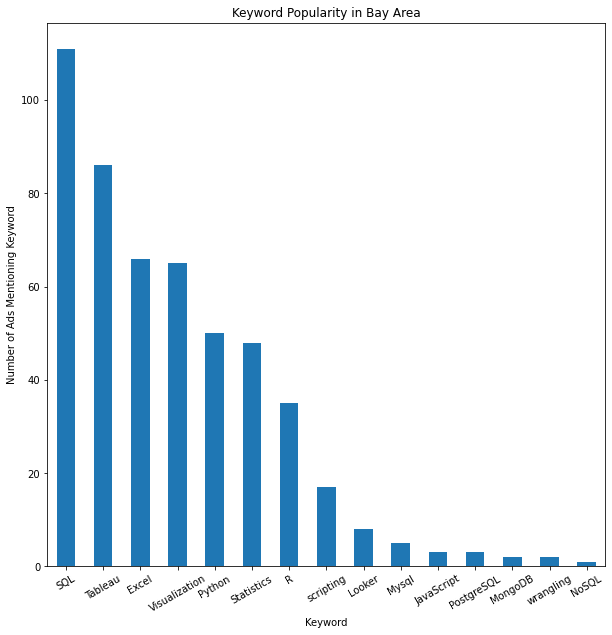

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# get individual keyword counts as percentage of ads mentioning the keyword
fig, ax = plt.subplots(1, 1, figsize=(10,10))
top_words_sf.plot.bar(x='Keyword', rot=30, ax=ax, legend=False)
ax.set_ylabel('Number of Ads Mentioning Keyword')
ax.set_title('Keyword Popularity in Bay Area');

# New York

Data Analyst, Full Time, New York, 50 Miles Radius

In [26]:
import requests
from bs4 import BeautifulSoup

ny_data_analyst_url = 'https://www.monster.com/jobs/search/Full-Time_8?q=Data-Analyst&where=New-York__2c-NY&rad=50&stpage=1&page=6'
hdr = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' }

response = requests.get(ny_data_analyst_url, headers = hdr)
soup = BeautifulSoup(response.text, 'html.parser')

In [27]:
all_listings = soup.find_all('section', attrs={'data-jobid': True})
ids = [item['data-jobid'] for item in all_listings]

In [28]:
print(all_listings)

[<section class="card-content" data-jobid="225170148" data-postingid="601570fb-54e9-4c6c-921b-ac04d6436aa0" onclick="MKImpressionTrackingMouseDownHijack(this, event)">
<div class="flex-row">
<div class="mux-company-logo thumbnail is-loaded">
<img alt="CyberCoders" src="https://media.newjobs.com/clu/xcyb/xcyberc3x/branding/6344/CyberCoders-logo.jpg"/>
</div>
<div class="summary">
<header class="card-header">
<h2 class="title"><a data-bypass="true" data-m_impr_a_placement_id="JSR2CW" data-m_impr_j_cid="559" data-m_impr_j_coc="xcyberc3x" data-m_impr_j_jawsid="486080214" data-m_impr_j_jobid="225170148" data-m_impr_j_jpm="1" data-m_impr_j_jpt="1" data-m_impr_j_lat="40.7453" data-m_impr_j_lid="534" data-m_impr_j_long="-74.032" data-m_impr_j_occid="11866" data-m_impr_j_p="1" data-m_impr_j_postingid="601570fb-54e9-4c6c-921b-ac04d6436aa0" data-m_impr_j_pvc="monster" data-m_impr_s_t="t" data-m_impr_uuid="5af01099-75e2-41f4-aceb-aaed03e0b910" href="https://job-openings.monster.com/senior-data-ana

In [29]:
loc_strings = list()
for x in all_listings:
    loc_string = x.find('div', attrs={'class': 'location'}).find('span', attrs={'class': 'name'}).text.strip()
    
    if ',' in loc_string:
        city, state = [a.strip() for a in loc_string.split(',')]
        state = state[:2]  # two-letter state format
        loc_strings.append(', '.join([city, state]))
    else:
        loc_strings.append('')
    
companies = [x.find('div', attrs={'class': 'company'}).find('span', attrs={'class': 'name'}).text.strip()
             for x in all_listings]

job_titles = [x.find('h2', attrs={'class': 'title'}).find('a', href=True).string.strip() for x in all_listings]

print(job_titles[0])
print(companies[0])
print(loc_strings[0])

Senior Data Analyst - Pharma/Healthcare
CyberCoders
Hoboken, NJ


In [30]:
import pandas as pd
# save job titles, companies and location to database
ny_job_info = list(zip(job_titles, companies, loc_strings))  
ny_job_info = pd.DataFrame(ny_job_info, columns = ['Job_Titles', 'Companies', 'Location'])
ny_job_info

,Job_Titles,Companies,Location
0,Senior Data Analyst - Pharma/Healthcare,CyberCoders,"Hoboken, NJ"
1,Business Analyst/Data Analyst - Banking Domain,Synechron,"Jersey City, NJ"
2,Data Engineer/Analyst (Marketing/Treasure Data),Michael Page,"New York, NY"
3,"Data Analyst SQL, Python, Hadoop & Cloud tools","F1 Technical Solutions, Inc.","New York City, NY"
4,"Temp to Perm Data Analyst Coordinator, private...","Beacon Hill Staffing Group, LLC","Manhattan, NY"
...,...,...,...
147,Senior Analyst,Randstad Technologies,"New York, NY"
148,Analyst - System Analysis and Program - II,The Judge Group,"Bridgewater, NJ"
149,Software Asset Management Analyst,Eclaro,"Princeton, NJ"
150,Business Support Specialist / Process Analyst ...,PSEG,"Newark, NJ"


In [31]:
ny_new_urls = [x.find('h2', attrs={'class': 'title'}).find('a', href=True)['href'] for x in all_listings]
ny_new_urls[0]

'https://job-openings.monster.com/senior-data-analyst-pharma-healthcare-hoboken-nj-us-cybercoders/225170148'

In [32]:
from tqdm import trange
import time

new_job_url = dict()
ny_job_description = dict() 
ny_sal_description = dict()
for x in trange(0,len(all_listings)):
    new_job_url[x] = ny_new_urls[x]
    response = requests.get(new_job_url[x])
    soup = BeautifulSoup(response.text, 'html.parser')
    
    job_body = soup.find('div', attrs={'name': 'value_description'})
    if job_body is None:
        job_body = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if job_body is None:
        job_body = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        job_body
    job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags
    value_salary = soup.find('div', attrs={'class': 'detail-row row'})
    if value_salary is None:
        value_salary = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if value_salary is None:
        value_salary = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        value_salary
    sal_desc = value_salary.get_text(separator=' ')  # add whitespace between HTML tags
    print(job_desc[:500] + '...')
    print(sal_desc)
    ny_job_description[x] = job_desc
    ny_sal_description[x] = sal_desc
    time.sleep(0)

  1%|          | 1/152 [00:00<01:53,  1.34it/s]

If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and acade...
Salary $110000  -  $150000   Per Year


  1%|▏         | 2/152 [00:01<01:52,  1.33it/s]

Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiatives for banks, asset managers, and insurance companies around the world. Synechron uniquely delivers these firms an end-to-end Digital, Consulting and Technology capabilities with expertise in wholesale banking, wealth management and insurance as well as emerging technologies like Blockchain, Artificial Intelligence, and Data Science. Based in New ...
Job Type fulltime ,  employee


  2%|▏         | 3/152 [00:01<01:33,  1.59it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Understand existing processes and workflows through interactions wit...
Posted   4   days ago


  3%|▎         | 4/152 [00:02<01:53,  1.30it/s]

We are looking to fill a new Data Analyst role with our direct health insurer client in NYC.  This is a remote spot for now, however would need to be local to NYC once pandemic is over. Candidate should be focused on optimizing and building our marketing data infrastructure working alongside a wide variety of data, product and business teams. This person will work closely with marketing management, data science, data visualization, and analytics teams to support them by building data sets and da...
Job Type fulltime ,  employee


  3%|▎         | 5/152 [00:03<01:33,  1.57it/s]

Private Equity firm investing in real estate and healthcare sectors seeks a Temp to Perm Data Analyst Coordinator to start right away. The day to day responsibilities of this role will center around providing data entry/back office support for the investor relations and finance teams. Specifically, the coordinator will enter investor data into their CRM system, help generate reports and help reconcile all the data that is logged into the accounting system. This is a fantastic opportunity for som...
Job Type fulltime ,  employee


  4%|▍         | 6/152 [00:04<01:53,  1.29it/s]

Responsible for performing extensive detailed data analysis necessary to ensure strict adherence to data quality guidelines. This role will conduct full lifecycle activities to include requirements analysis and design, develop analytics and reporting capabilities, and continuously monitor performance and quality control plans to identify improvements and alerting of potential issues. This person is essential to gaining a better insight into the client's business data deficiencies, formulating a ...
Job Type fulltime ,  contract


  5%|▍         | 7/152 [00:05<01:54,  1.27it/s]

  Our client in Middlesex County, NJ, a leading philanthropic and social service agency, is seeking to hire a lead data professional , Data Manager/Analyst,  to help advance their philanthropic and fundraising efforts in an increasingly challenging and competitive marketplace.  This is a fast-paced office with a small team of about 15 people that are very “hands on”.  Prior Non-Profit experience would be a huge plus. Must be very advanced in Excel skills.  Must be US Citizen or Green Card  holde...
Salary $60000  -  $70000   Per Year


  5%|▌         | 8/152 [00:06<02:06,  1.14it/s]

Our company is looking for an Sr. Software Engineer/ Data Engineer/Big Data Analyst who will be performing following roles and responsibilities:  Serve as a technical liaison effectively working with large data and configuration of different tools/frameworks/products/ applications to meet specific project implementation objectives. Design, development, customization, integration and implementation of the software products Big Data, Data Analytics and Visualization solutions. Design and Develop B...
Job Type fulltime ,  employee


  6%|▌         | 9/152 [00:06<01:53,  1.26it/s]

Our client, one of the top US investment banks, offering securities underwriting and trading, mergers and acquisitions advice, research, private equity investment, and risk management products, is seeking a Data Analyst 4 (Non IT) Location:  Morrisville, NC Position Type:  Contract    Job Responsibilities: -To help scope out requirements for data management framework adoption.  -To help collect, collate and capture data elements as identified by report owners and data providers into excel spread...
Job Type fulltime ,  employee


  7%|▋         | 10/152 [00:07<01:49,  1.30it/s]

  Job Description We have an exciting opportunity for a Data Lineage Analyst with our industry-leading client in New York, NY. We will accept corp to corp or w2 contractors. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance. Responsibilities: Responsible for determining systems requirements for new or modified database application programs, creates the system specifications and Is responsib...
Job Type fulltime ,  employee


  7%|▋         | 11/152 [00:08<02:00,  1.17it/s]

We have been engaged to help our client find a  Business Analyst  with  retail or supermarket  experience located in their Carson, CA offices.  The company is a well known supermarket chain that is part of much larger parent company located primarily on the west coast. Summary The Retail Business Analyst will part of the Information Technology team within the Merchandising Analytics & Consumer Insights organization. The successful candidate will possess a strong mix of technical skills and busin...
Salary $75000  -  $95000   Per Year


  8%|▊         | 12/152 [00:09<01:39,  1.41it/s]

A client of Sharp Decisions Inc. is actively looking to bring on a  Data Analyst  to be based in  New York, NY.  E xperience building dashboards in Tableau is required.  Person will be working remote but when offices reopen, individual may be asked to go onsite. This is a  contract  only position for 4-6 months.  *W2 only. Overview The FP&A (Financial Planning & Analysis) group is seeking a Data Analyst to support our Business Intelligence Lead in continuing to build out an exciting new function...
Salary $35  -  $50   Per Hour


  9%|▊         | 13/152 [00:10<01:52,  1.24it/s]

Job Description: Partner with service owners of technology systems to define inventory data governance requirements and build consensus and agreement on the delivery, scope and timeline of IT data governance projects. Create Tableau and PowerBI dashboards to guide providers and consumers of inventory data in the management and governance of data quality improvement initiatives Facilitate, schedule and document working groups and steering committees around data quality management and governance E...
Salary $450  -  $500   Per Day


  9%|▉         | 14/152 [00:10<01:35,  1.45it/s]

Data Analyst, Salesforce One of our clients, medical devices and services company is looking for an enthusiastic  Data Analyst  with Salesforce experience and SAP as a big plus. ** Must be authorized to work in US for ANY EMPLOYER.    No H1 Visa support  for this position. The Location is Northern New Jersey Permanent position with great benefits. To be considered immediately please send your resume to igork@brainsworkgroup.com Job Summary:   Primary responsibilities include: governance, mainten...
Job Type fulltime ,  employee


 10%|▉         | 15/152 [00:11<01:41,  1.35it/s]

A rapidly growing e-commerce company is looking for a  Sales Data Analyst / Salesforce Admin  to join their team immediately on a contract basis with a possibility of going full-time for the right candidate. 
  Salary/Hourly Rate: 
  $35-45/hr 
  Position Overview: 
  A rapidly growing e-commerce company is looking for a Sales Data Analyst / Salesforce Admin to join their team immediately on a contract basis with a possibility of going full-time for the right person. This role will focus on repo...
Posted   19   days ago


 11%|█         | 16/152 [00:11<01:35,  1.42it/s]

Data Analyst Location: Newark, NJ Duration: 6+ month contract to hire Interview process: Phone and WebEx Req. # 20-01720 Contact: Brian Anderson banderson@contech-it.com D. 952-562-4101 Job Summary: Data analysts are experts with strong understanding of data structures and analysis. They are responsible for ensuring requirements around the accuracy, quality, completeness, and timeliness of data are captured and understood. They work hand in hand with Data Modelers, Data Developers, Data Stewards...
Job Type fulltime ,  contract


 11%|█         | 17/152 [00:12<01:38,  1.36it/s]

Focus on enhancing and delivering on a handful of key initial projects, including but not limited to KPI & Exec reporting, Strategy & Innovation team support, and B2B revenue reporting Help develop wider scope and projects, identify additional opportunities and measure against delivery of Business Intelligence roadmap according to timelines Revamp and build out revenue and KPI analysis to understand business performance measured against targets, strategies, and trends Develop understanding of da...
Salary $30  -  $35   Per Hour


 12%|█▏        | 18/152 [00:13<01:30,  1.49it/s]

NAVA Software Solutions is looking for a Sr. Data Analyst with PM exp. for one of our clients.       Details:   Sr. Data Analyst with PM exp.   Location: New York, NY - Remote till Covid   Duration: Full time/Permanent         Responsibilities:     Effectively interact with Business Management, Client Coverage and CRM & Sales Enablement teams to understand the business needs.   Lead projects to implement a client centric data architecture and execution of integrating data across multiple sources...
Job Type fulltime ,  employee


 12%|█▎        | 19/152 [00:13<01:18,  1.70it/s]

NGS DATA ANALYST SUMMIT, NJ    Project Description:   We seek a talented, collaborative inter-disciplinary computational scientist to work on the analysis, statistical modeling and generation of hypotheses from high-dimensional tissue, cell and molecular profiling data. This individual will play a key scientific role leveraging innovative computational analysis strategies and rich patient data to empower data-driven decisions in collaboration with the Client's Translational Development organizat...
Job Type fulltime ,  contract


 13%|█▎        | 20/152 [00:14<01:13,  1.80it/s]

Description: • Prepare analyses of integrated information from multiple systems to support routine and ad hoc reporting on the quality of safety information management from CEPs, CIT tools, and social listening activities. o Customer Interaction Tracking (CIT) tools are used by Commercial Customer Facing Colleagues to plan and track their interactions with Healthcare Professionals (HCPs), and may include product safety information reported by HCPs during these interactions. o Social listening in...
Job Type fulltime ,  employee


 14%|█▍        | 21/152 [00:14<01:12,  1.81it/s]

The job you asked for is not available....
The job you asked for is not available.


 14%|█▍        | 22/152 [00:15<01:25,  1.52it/s]

Introduction At IBM, work is more than a job - it's a calling: To build. To design. To code. To consult. To think along with clients and sell. To make markets. To invent. To collaborate. Not just to do something better, but to attempt things you've never thought possible. Are you ready to lead in this new era of technology and solve some of the world's most challenging problems? If so, lets talk. Your Role and Responsibilities Data analyst, responsible  for working with the Research community to...
Job Type fulltime ,  employee


 15%|█▌        | 23/152 [00:16<01:17,  1.66it/s]

                        LRS Consulting Services is seeking a Communication Specialist for our client in Stamford, CT. This is a long-term contract opportunity with the right-to-hire. LRS Consulting Services has been delivering IT excellence for over three decades. Our reputation for quality, flexibility, and strong relationships with our clients keeps them turning to us to meet their IT consulting needs. Our contacts combined with your technical expertise equals career possibilities for you. So ...
Posted   20   days ago


 16%|█▌        | 24/152 [00:16<01:08,  1.86it/s]

Our client, a world leading Food & Beverages Company in Purchase, NY is currently looking for a Data Analyst / Procurement Department to join their expanding team Position Details: Job Title:  Data Analyst / Procurement Department Duration: 3 months contract Location: Purchase, NY Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan Job Description: Assist with resolution...
Job Type fulltime ,  contract


 16%|█▋        | 25/152 [00:17<01:21,  1.55it/s]

                                              About USDM                           USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects glob...
Job Type fulltime ,  employee


 17%|█▋        | 26/152 [00:17<01:12,  1.73it/s]

Location:   Monmouth (Township), IL Description:   Our client is currently seeking a Data Analyst (Entry)-Data Science-R&D    Knowledge in working with one or more of the following tools: SAS, Spotfire, J-Review, R, SAS, JavaScript, Python, or Perl.  A thorough understanding of data standards. Filter, tag, join, parse, and normalize data sets for use in analytical models.  Create reports and dashboards from a versatility of data. Work with data manager or steward to resolve data quality issues a...
Job Type fulltime ,  contract


 18%|█▊        | 27/152 [00:18<01:08,  1.83it/s]

 job summary: Our client is a global leader in the Pharmaceutical and CPG industries and is looking for a Data Science Analyst to join their growing team. 
 If you have 2-5 years of Analysis experience, a passion for data, and are looking for an opportunity to be challenged and grow your skills while doing work that makes a real impact, then we want to hear from you! 
    location: Raritan, New Jersey job type: Contract salary: $45 - 55  per hour work hours: 8am to 5pm education: Bachelors   res...
Salary $45  -  $55   Per Hour


 18%|█▊        | 28/152 [00:18<01:04,  1.91it/s]

  This large banking client of ours is looking for an experiences Marketing Analyst to join their team for a long term remote opportunity. They need someone with expert level experience using the Evergage platform, also known as Interaction Studio. If you come with that experience and have at least 5 years of marketing tenure then please keep reading!  Responsibilities 
	•Consults with and works across functional teams to strategize, plan and ensure execution of a variety of marketing, developme...
Salary $65  -  $67   Per Hour


 19%|█▉        | 29/152 [00:19<01:13,  1.68it/s]

Thorlabs is seeking candidates with strong analytical skills who are willing to take on a variety of business intelligence projects. This position is responsible for generating actionable data to support decisions related to sales and marketing, new business opportunities, product development, acquisitions, and the overall strategic direction of the company. He/she will be able to think of ways to creatively provide a basis for decisions on niche markets where more traditional sales and marketin...
Job Type fulltime ,  employee


 20%|█▉        | 30/152 [00:20<01:29,  1.37it/s]

Our client, a well-established health care facilities corporation seeks to hire a Business Intelligence Developer  to be based out of their NYC headquarters. They are looking for a creative and analytical individual with the ability and experience to study, validate, organize, and present data into meaningful reports and dashboards that drive well-informed business decisions. The Business Intelligence Developer will be responsible for identifying specific data needs from internal teams, analyzin...
Job Type fulltime ,  employee


 20%|██        | 31/152 [00:21<01:19,  1.53it/s]

We’re passionate, we’re collaborative and we are growing. AArete is looking for an experienced Pharmacy professional. You are highly analytical with an entrepreneurial spirit and commitment to excellence. You have the desire and ability to be part of a fast-growing area, with an opportunity for advancement.  You excel in a team environment and have the ability to flip tasks and priorities midstream because you love an exciting challenge. The bar is set high at AArete. There is a lot to do around...
Posted   15   days ago


 21%|██        | 32/152 [00:21<01:23,  1.43it/s]

ACS group has an immediate need for a "Data Scientist" with experience in the Pharmaceutical Industry. This is a 6 - month contract opportunity and is located in Lawrenceville, NJ. Our client is a leading Pharmaceutical company.   Please review the job description below:   Top Skills:  Bioinformatics Clinical Data Analysis GitHub Machine Learning Pharmaceutical / Clinical     Hiring manager Comments: EM is looking for a Data Scientist with a translational bioinformatics background for late stage...
Job Type fulltime ,  contract


 22%|██▏       | 33/152 [00:22<01:31,  1.31it/s]

Location:  US-NY-Melville Requisition ID:  24640 Category:  Audit/Compliance Position Type:  Full-Time Overview Canon U.S.A., Inc. is seeking a Business Intelligence Analyst/Data Analytics (Analyst, Business Intelligence) savvy professional to join our Audit & Business Consultation team. We're looking to study our internal data sources to drive insight & value through analytics/visualization & improve efficiencies through process automation. In this role, you will be expected to understand busin...
Posted   2   days ago


 22%|██▏       | 34/152 [00:23<01:20,  1.46it/s]

Job Requisition Number: 89108 This position can sit in Princeton NJ or NYC 
 **Please note this is a contract position** 
  
Bloomberg runs on data. As the Enterprise Data Warehouse and Business Intelligence team, we are responsible for driving analytics throughout the organization to improve our products, engage better with our customers, create greater efficiencies, and drive new businesses by providing insights into the data. Can you change the way our business works? 
  
Are you motivated to...
Posted   3   days ago


 23%|██▎       | 35/152 [00:23<01:16,  1.53it/s]

Data is fundamental to making informed business and people decisions.  Dedicated teams focus on data development, governance and analytics to ensure our firm manages all aspects of the data cycle -- from building and controlling to maintaining and delivering large data sets -- in the most effective and efficient way. Data teams across the firm embody a keen attention to detail and quantitative discipline. Divisions and Job Functions Please note division and function examples are representative o...
Job Type fulltime ,  employee


 24%|██▎       | 36/152 [00:24<01:13,  1.58it/s]

MSI has partnered with a leading company in Melville, NY in their search for a skilled BI Analyst. This is a great opportunity to join a great organization with a strong reputation.  Permanent role with full benefit package available! Seeking:  3-5 years of experience as a Business Analyst. Experience with SQL, ETL, Tableau and Python Experience with Reporting and Analytics. Bachelor's degree required Our client is motivated to move quickly on this role, apply today!...
Job Type fulltime ,  employee


 24%|██▍       | 37/152 [00:25<01:16,  1.50it/s]

Job Title:  Data Test Engineer (SDET)  Location:  Remote  Job Type:  Contract   Summary  Data Test Engineers (SDET) test and verify applications developed under data pipelines using Java programming language & Apache Kafka and work closely with the data development teams to validate events and analytics.  This role is a DTE with a focus on data application validation. In this role you will apply your SDET and SQL experience to verify multiple data applications and tools. This DTE will work with ...
Job Type fulltime ,  contract


 25%|██▌       | 38/152 [00:25<01:13,  1.55it/s]

Find what drives you on a team with a 70+ year history of being recognized for discovery, determination, and innovation. As         a global leader in high-tech filtration, separation, and purification, Pall Corporation thrives on helping our customers protect         people. Our portfolio is broad, so if your interests lie along the spectrum of Life Sciences to Industrial, you'll find a         rewarding role here. Our career opportunities are as diverse as our products and they are all focused...
Job Type fulltime ,  employee


 26%|██▌       | 39/152 [00:26<01:19,  1.43it/s]

Requisition ID:  63281   Job Function/Category:  Business Services   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employee...
Job Type fulltime ,  employee


 26%|██▋       | 40/152 [00:27<01:13,  1.52it/s]

More than 30 years ago, E*TRADE pioneered the online brokerage industry by executing the first-ever electronic individual          investor trade. While the landscape of our industry has changed dramatically, our culture of innovation and drive to make          online trading accessible to everyone continues to drive us forward. We believe in challenging the status quo, fostering an          environment of curiosity and learning, and, above all, putting our customers first. SUMMARY The          ...
Job Type fulltime ,  employee


 27%|██▋       | 41/152 [00:27<01:03,  1.74it/s]

We are looking for ambitious 2020 & 2021 graduates to join a leading private equity advisory and placement group in New York. This is an amazing and rare opportunity for graduates to launch their career in private equity. This role would suit a recent or upcoming graduate with good internship experience who is keen to develop their understanding of the Private Equity industry and work in a varied, fast-paced environment. The role supports the Deals team, delivering high-quality outputs to the cl...
Salary $60000   Per Year


 28%|██▊       | 42/152 [00:28<01:11,  1.53it/s]

Bracco Diagnostics Inc., has an opening for a Contract & Pricing Analyst in the Monroe, NJ office.    CONTRACT AND PRICING ANALYST     SUMMARY:         	Responsible for the execution of time sensitive, process related activities pertaining to end-to-end contract management, analytics, reporting, internal auditing, rebate & admin fee processing, and contract language analysis. Additionally, this position will have a focus on project management in a fast-paced team environment.      DUTIES AND RES...
Job Type fulltime ,  employee


 28%|██▊       | 43/152 [00:28<01:05,  1.65it/s]

EBP Supply Solutions,  a leading provider of Cleaning and Food Service supplies and services to commercial institutions, is currently seeking an  experienced , conscientious, detail oriented and enthusiastic  Junior Business Analyst  to join our team in Milford, CT. As part our Business Analytics Group, the  Junior Business Analyst  position will support all departments within the organization, responsible for gathering and analyzing information, and delivering timely, accurate information on re...
Salary $48000  -  $52000   Per Year


 29%|██▉       | 44/152 [00:29<01:06,  1.62it/s]

The job you asked for is not available....
The job you asked for is not available.


 30%|██▉       | 45/152 [00:30<01:13,  1.46it/s]

The job you asked for is not available....
The job you asked for is not available.


 30%|███       | 46/152 [00:31<01:18,  1.36it/s]

Contributes to process optimization, support analysis of current and future state processes through modeling using BPM (Business Process Management) techniques, and help define and optimize how relevant business information flows throughout the organization. Performs complex analysis to troubleshoot operational and application issues, particularly involving third party business applications that are in production. Promptly acknowledges requests from business units, performs various levels of ana...
Job Type fulltime ,  employee


 31%|███       | 47/152 [00:32<01:26,  1.21it/s]

Financial Analyst   Goya Foods, Inc., a leader in the food industry based in Jersey City, New Jersey is seeking a Financial Analyst to provide analysis, communications and actions with the objective of providing insights, prompting actions and taking actions to improve business performance and profitability. The ideal candidate will  report  to the Vice President of Finance .   Duties and Responsibilities:     Daily/weekly/monthly sales, gross profit, expense and other key performance (KPIs) rep...
Job Type fulltime ,  employee


 32%|███▏      | 48/152 [00:32<01:21,  1.27it/s]

Overview Position requires interactional work, efficiently coordinating with the members of the Finance Department to develop Power BI dashboards, and assist in streamlining current processes within the Finance Team using Power BI.  This includes decision support Power BI models to provide visibility and assessment of financial data. This is a highly visible position and is required to make independent decisions.   Responsibilities   Establish, manage, and assist in the development of Power BI r...
Job Type fulltime ,  employee


 32%|███▏      | 49/152 [00:33<01:11,  1.43it/s]

If you are a Senior SAS Data Analyst - RWE/Claims with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia...
Salary $110000  -  $150000   Per Year


 33%|███▎      | 50/152 [00:33<01:07,  1.51it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Assist in the planning, design, and development of new applications ...
Posted   18   days ago


 34%|███▎      | 51/152 [00:34<01:17,  1.31it/s]

Our company is looking for an Lead Data Business Intelligence Analyst who will be performing following roles and responsibilities:  Building, enhancing, testing, integrating various custom dashboards, management reports, business intelligence and data analytics modules and reports; Customizing products for each study protocol and for each client; Technical contribution and technical spec preparation of application design, database design, component design, architecture and framework design, data...
Job Type fulltime ,  employee


 34%|███▍      | 52/152 [00:35<01:06,  1.50it/s]

LEAD DATA ANALYST - 6-MONTHS RIGHT TO HIRE NEWARK, NJ If interested in discussing, please call Rita 914-461-1670 or email  rdelosa@contech-it.com Job Summary: Data analysts are experts with strong understanding of data structures and analysis. They are responsible for ensuring requirements around the accuracy, quality, completeness, and timeliness of data are captured and understood. They work hand in hand with Data Modelers, Data Developers, Data Stewards and Business  SMEs  to ensure the custo...
Job Type fulltime ,  contract


 35%|███▍      | 53/152 [00:36<01:04,  1.52it/s]

NAVA Software Solutions is looking for a Sr. Data Analyst for one of our clients.       Details:   Sr. Data Analyst   Location: New York, NY     Remote till covid   Duration: Full time/Permanent       Mandatory: MS SQL   Better to have: Python       This is a brand new team that is being built from the ground floor. Hiring Manager is a SVP, Head of Enterprise data Governance. She seeks (2) 5-10 year people who will report directly to her to assist her in building out the roadmap for and standing...
Job Type fulltime ,  employee


 36%|███▌      | 54/152 [00:36<00:56,  1.72it/s]

PROJECT COORDINATOR/QUALITY ANALYST WITH PHARMACEUTICAL AND DATA ANALYSIS EXP. BRANCHBURG, NJ   Project Description:   The Data Integrity Project Analyst, with minimal supervision, manages cross-functional, complex projects utilizing PMI methodology This position is responsible for the management, coordination, implementation, and control of local Data Integrity projects, while ensuring alignment with the strategy, priorities, and goals of the site. This role must interact and influence at all l...
Job Type fulltime ,  contract


 36%|███▌      | 55/152 [00:36<00:49,  1.94it/s]

Position Details: Our client, a world-leading Pharmaceutical Company in  Peapack , NJ is currently looking for a Senior Data Analyst (MS Access, Excel) to join their expanding team. Job Title: Senior Data Analyst (MS Access, Excel) Duration: 18 Months Contract Location:  Peapack , NJ Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan. Job Description:  Prepare  analyses...
Job Type fulltime ,  contract


 37%|███▋      | 56/152 [00:37<00:45,  2.12it/s]

Title for this position: Business Data Analyst Onsite:   yes, remote to start  Longterm contract This position is located in Montvale, NJ   Responsibilities:    Work with a multi-disciplinary team   Partner with Product Managers and SMEs to elicit and document existing data points and applications processes   Analyze and document process discrepancies and/or application integration issues; identify and obtain agreement on process improvements   Develop a data model across multiple applications; ...
Job Type fulltime ,  employee


 38%|███▊      | 57/152 [00:37<00:44,  2.13it/s]

  Job Description Our industry-leading client is seeking a short-term BI Application Migration Manager to manage a data center migration from end-to-end. Due to client requirement, applicants must be willing and able to work on a w2 basis. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance. Requirements of the BI Application Migration Manager: Bachelor's degree or equivalent and at least 7 y...
Job Type fulltime ,  employee


 38%|███▊      | 58/152 [00:38<00:45,  2.08it/s]

 job summary: Our client, a growing service provider offering a cloud-based analytics tool that helps the competitive retail market.  They are a fast-moving environment where learning, thinking outside the box and collaboration are always encouraged.  This is a unique opportunity to join an exciting company, make your mark on a growing business and learn from smart and interesting colleagues.  The position requires architecting, designing and programming of the company Applications involving SW ...
Salary $125000  -  $139999.99   Per Year


 39%|███▉      | 59/152 [00:39<00:55,  1.68it/s]

Location:   Princeton, NJ Description:   Our client is currently seeking a MS BI Reports Developer for a permanent/direct hire position based in the Princeton, NJ area. Visa Sponsorship is not available for this position. Qualified candidates may email JGearhart@Judge.com for immediate consideration.   Qualifications & Requirements: 10 years experience in SQL Server Development, Data warehousing, Data Analysis and Business Intelligence Reporting applications as a BI/Database Developer with exper...
Job Type fulltime ,  employee


 39%|███▉      | 60/152 [00:39<01:02,  1.47it/s]

Introduction Known as the 'knowledge behind the numbers', Financial Analysts are considered to be trusted business advisors, working within IBM’s business units and geographies, as well as in a myriad of specialized corporate functions. IBM's finance organization is instrumental in driving innovative improvements to global financial processes while providing measurable value to the business. Your Role and Responsibilities AI, Cloud, Blockchain, Internet of Things (IoT)—IBM does more than just cr...
Job Type fulltime ,  employee


 40%|████      | 61/152 [00:40<00:54,  1.67it/s]

About Synechron: Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiatives for banks, asset managers, and insurance companies around the world. Synechron uniquely delivers these firms an end-to-end Digital, Consulting and Technology capabilities with expertise in wholesale banking, wealth management and insurance as well as emerging technologies like Blockchain, Artificial Intelligence, and Data Scien...
Job Type fulltime ,  employee


 41%|████      | 62/152 [00:40<00:49,  1.83it/s]

Requisition ID:  64636   Job Function/Category:  Administrative Support   Employment Type:  Non-Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000...
Job Type fulltime ,  employee


 41%|████▏     | 63/152 [00:41<00:51,  1.73it/s]

We are looking for ambitious 2020 & 2021 graduates to join a leading private equity advisory and placement group in New York. This is an amazing and rare opportunity for graduates to launch their career in private equity. This role would suit a recent or upcoming graduate with good internship experience who is keen to develop their understanding of the Private Equity industry and work in a varied, fast-paced environment. The role supports the Deals team, delivering high-quality outputs to the cl...
Salary $60000   Per Year


 42%|████▏     | 64/152 [00:41<00:51,  1.71it/s]

If you are a Senior R Data Analyst - RWE/Claims with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia. ...
Salary $100000  -  $150000   Per Year


 43%|████▎     | 65/152 [00:42<00:44,  1.96it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 
 
 Conduct credit risk focused business and data analysis 
 Credit ...
Posted 30+ days ago


 43%|████▎     | 66/152 [00:42<00:45,  1.90it/s]

Job Description: EM is looking for a Data Scientist with a translational bioinformatics background for late stage oncology studies. Strong statistical modeling and analysis experience. wanted. They will analyze the molecular profiles of diseases, so Translational or Precision medicine experience is also wanted. Candidate should be able to speak Cox model, logistical regression, random effect, mixed effected models and Time-varying covariates. They should know when to use each model. Strong R and...
Job Type fulltime ,  employee


 44%|████▍     | 67/152 [00:43<00:44,  1.93it/s]

 job summary: Our enterprise client has a temp to perm opportunity for an experienced Business Intelligence (BI) Analyst to identify business intelligence, reporting, and data analysis needs. 
  Candidate will work closely with Business and Technical teams to turn data into critical information and knowledge that can be used to make sound business decisions. 
  BI Analysts must understand how data is turned into information and knowledge and how that knowledge supports and enables key business p...
Salary $55  -  $69   Per Hour


 45%|████▍     | 68/152 [00:44<00:50,  1.66it/s]

About Synechron : Synechron is one of the fastest-growing digital, business consulting & technology firms in the world. Specialized in financial services, the business’ focus on embracing the most cutting-edge innovations combined with expert knowledge and technical expertise has allowed Synechron to reach $500+ million in annual revenue, 8,000 employees and 18 offices worldwide.  Synechron is agile enough to invest R&D into the latest technologies to help financial services firms stand at the c...
Job Type part time ,  employee


 45%|████▌     | 69/152 [00:44<00:55,  1.51it/s]

Requisition ID:  64583   Job Function/Category:  Finance / Accounting   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 emplo...
Job Type fulltime ,  employee


 46%|████▌     | 70/152 [00:45<01:00,  1.35it/s]

Introduction At IBM, our Project Managers excel by leading and coordinating a project team’s overall performance, scope, cost, and deliverables. Our clients rely on timely and efficient status reports, and as Project Manager, you will drive the charge with project direction, metric definition, and performance management. If you are ready to help our clients and project teams succeed, we would love to meet you! Your Role and Responsibilities Introduction: (IT Specialist – Business Analyst)   Busi...
Job Type fulltime ,  employee


 47%|████▋     | 71/152 [00:46<00:56,  1.44it/s]

If you are a Data Analyst with experience, please read on! 
We are a growing, entrepreneurial, fast paced organization looking for a Data Analyst to join our team! 
 
We are looking for someone who is super strong in SQL and Excel with a background in financial reporting. What You Need for this Position - Bachelor's degree - 4+ years of Data Analyst experience 
- Expert skills in SQL Server 
- Expert skills in Excel 
- Solid knowledge of financial reporting , general accounting, operations, cash...
Job Type fulltime ,  employee


 47%|████▋     | 72/152 [00:47<00:52,  1.52it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

This role operates in both a reporting analyst and data analyst ca...
Posted 30+ days ago


 48%|████▊     | 73/152 [00:47<00:54,  1.46it/s]

 job summary: Randstad Technologies is hiring and we're looking for someone like YOU to join our team!  If you are seeking a new opportunity, looking to grow in your career, or you know someone who is - we want to hear from you!  Take a look at the below opportunity, or feel free to visit RandstadUSA.com to view and apply to any of our open roles. 
    location: Basking Ridge, New Jersey job type: Contract salary: $65 - 69  per hour work hours: 8am to 5pm education: Bachelors   responsibilities:...
Salary $65  -  $69   Per Hour


 49%|████▊     | 74/152 [00:48<00:47,  1.65it/s]

Business Intelligence Engineer  6 months plus possible extensions  Remote - working PST Hours  Please send resumes to Karen.Bigini@nttdata.com  We are looking for a  Business Intelligence Engineer to join a  leading media and entertainment company that creates and distributes premium and popular content Globally.  The  streaming entertainment offering within this group was launched in May 2020 and is the culmination of some of the most innovative new technology and greatest creative talent in th...
Job Type fulltime ,  employee


 49%|████▉     | 75/152 [00:48<00:48,  1.59it/s]

Requisition ID: 63743  Job Function/Category: Operations  Employment Type: Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees who are dedi...
Job Type fulltime ,  employee


 50%|█████     | 76/152 [00:49<00:48,  1.56it/s]

Introduction Are you looking for a career that will allow you to use your unique blend of business acumen and tech savvy? Business Analysts at IBM are subject matter experts that build the bridge between our business and our clients, immersing themselves into the market to understand problems and find innovative solutions. Be ready to navigate the complex relationships that make the business world run and find the actionable insights that result in great business decisions. Your Role and Respons...
Job Type fulltime ,  employee


 51%|█████     | 77/152 [00:50<00:53,  1.41it/s]

  SUMMARY:   The position of Epic Analyst requires an individual that possesses functional knowledge and skills in EPIC products that are used to conduct clinical operations. The Epic Analyst will be responsible for workflow analysis, building, training, troubleshooting, go-live and post go-live support and optimization. This position will provide guidance in the development of end user requests; perform maintenance, as well as troubleshoot the Epic applications. The candidate will participate i...
Job Type fulltime ,  employee


 51%|█████▏    | 78/152 [00:51<00:53,  1.39it/s]

Senior Insurance Product Analyst Job Information While we’ve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to ...
Posted   4   days ago


 52%|█████▏    | 79/152 [00:52<00:56,  1.28it/s]

Primary Job Duties & Responsibilities: Elicit, gather, analyze and validate customer and end user needs by: discovery/research, data analysis, gap analysis, interviews, documenting complex process/task/work flows, storyboards, user stories, scenarios, use cases and by other BA methods. Identify scope and parameters of requirements analysis on a project-by-project basis to define impact, outcome criteria and metrics. Collaborate with internal and external stakeholders, to assess cross product and...
Job Type fulltime ,  contract


 53%|█████▎    | 80/152 [00:52<00:54,  1.33it/s]

Position Overview:  The Open-Source Security Analyst is ideally based Baltimore, MD. Candidates may also be considered in Fort Worth, New York City, Evansville, and Fort Mill. Open-Source Security Analyst will scan, track, analyze, and report on vulnerabilities in open-source software as part of the vulnerability management process. To accomplish this, you will work closely with our internal security teams, managed service providers, project team, and other partners to help develop an open-sourc...
Posted   1   Day ago


 53%|█████▎    | 81/152 [00:53<00:48,  1.47it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

The Data Analyst will be expected to perform the following tasks i...
Posted   29   days ago


 54%|█████▍    | 82/152 [00:53<00:40,  1.71it/s]

We are constantly improving our capabilities to increase product discoverability and decrease the time between a customers search and purchase. 
If you are a Director of Data Analytics with experience, please read on! What You Will Be Doing - Utilize internal & external data sources to identify promising new trends to aid in marketing strategy and product development - Develop a deep knowledge of both our dataset & our clients' product categories 
- Oversee a small team of data analysts & virtua...
Salary $180000  -  $225000   Per Year


 55%|█████▍    | 83/152 [00:54<00:46,  1.48it/s]

 job summary: Our client, a growing Financial Services firm is growing their Chief Data Office (CDO) team is seeking an Enterprise Data & Business Intelligence (BI) Platform Leader to join the New York City location. This is an opportunity to influence and innovate as part of the new CDO function. A primary objective of this role is to enable internal and external customers to easily access and consume data to support new product innovation, existing product workflows, operational reporting and ...
Salary $220000  -  $230000   Per Year


 55%|█████▌    | 84/152 [00:55<00:49,  1.36it/s]

Requisition ID:  65339   Job Function/Category:  Communications   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employees w...
Job Type fulltime ,  employee


 56%|█████▌    | 85/152 [00:55<00:40,  1.64it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

* Transforming existing excel reports into Tableau dashboards

* D...
Posted   12   days ago


 57%|█████▋    | 86/152 [00:56<00:45,  1.45it/s]

Requisition ID:  65307   Job Function/Category:  Customer Services   Employment Type:  Non-Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 empl...
Job Type fulltime ,  employee


 57%|█████▋    | 87/152 [00:57<00:51,  1.27it/s]

If you are a Senior Revenue Operations Analyst with Tableau and SQL experience, please read on! 
We are one of the worlds leading providers of cloud-based technology and software solutions. Our mission is to provide small and medium sized business with the right technology in order to achieve their goals.  
 
If you are a Senior Revenue Operations Analyst who wants to work at a company that motivates and empowers its employees please apply today! Top Reasons to Work with Us -Culture of collabora...
Salary $100000  -  $130000   Per Year


 58%|█████▊    | 88/152 [00:58<00:44,  1.43it/s]

Our client provides cost-effective, high quality resources to meet consumer needs through eCommerce and retail locations.  This firm’s finance division has years of experience and prides itself on growing business relationships, and providing exceptional service along the way.  Don’t miss your chance as a  Financial Analyst  to be part of an organization that takes care of their employees with abundant PTO days, lucrative bonus payouts, and flexible work hours.  This position is temporarily remo...
Posted Today


 59%|█████▊    | 89/152 [00:58<00:40,  1.57it/s]

Bay State Search has teamed up with our client a World Class Software and Information Service Provider company located in New York, NY.  We have been asked to identify a Financial Analyst with strong Excel. This person will be asked to complete interesting and challenging analytical projects with the Finance Manager.  Be able to separate the “signal from the noise”.  The ideal candidate will thrive in a high-profile collaborative environment   ABOUT THE ROLE This is a high-profile role that will...
Salary $25  -  $25   Per Hour


 59%|█████▉    | 90/152 [00:59<00:34,  1.78it/s]

Looking for an IT PM/BA with strong project management and excellent analysis skills Data analysis experience( Trade data preferred but any other will work) Heavy SQL to do comparisons. Experience in risk management. Experienced in  Issue identification, escalation and resolution. Excellent Written, Presentation and Communication Skills with ability to manage and influence across teams. Good understanding of SDLC knowledge. Good with object oriented knowledge (python) and technically strong Very...
Job Type fulltime ,  contract


 60%|█████▉    | 91/152 [01:00<00:42,  1.42it/s]

CMBS Analyst As a Commercial Mortgage Backed Securities (CMBS) Analyst, you will conduct thorough quantitative and qualitative analysis on the underlying loans and properties that collateralize Commercial Mortgage Backed Securities transactions. In addition, you will assist other analysts with setting up Net Cash flow models; assist with special projects/initiatives, as needed. - Analyze the credit risk in SF securities by performing tasks that includes reviewing deal documents, surveillance, an...
Salary $65000  -  $80000   Per Year


 61%|██████    | 92/152 [01:01<00:46,  1.29it/s]

Our client, a multinational electronics company, is seeking a Business Professional - Supply Chain Analyst 4 Location:  Ridgefield Park, NJ Position Type:  Contract    Job Summary: HA Builder SCM department is responsible for managing supply chain initiatives, forecasting, planning inventory and meeting delivery requirements including providing recommendations and solutions to the business team including Executives. The Senior Manager, Builder SCM is responsible for managing a wide range of prod...
Job Type fulltime ,  employee


 61%|██████    | 93/152 [01:01<00:39,  1.49it/s]

CYBERSECURITY ANALYST   One of our global clients is seeking a Cybersecurity Analyst that will be responsible for incident detection and response, threat hunting, and data analysis to protect and maintain the overall security of the corporation. Responsibilities The Cybersecurity Analyst will be responsible for, but not limited to the following:  D etect threats through all stages of an attack Investigate security events Gather forensic evidence for investigation and remediation Analyze a variet...
Job Type fulltime ,  employee


 62%|██████▏   | 94/152 [01:01<00:36,  1.57it/s]

  Job Description     **Remote opportunity; qualified candidates will be able to support EST work hours.   We have an exciting opportunity for a Business Analyst with our industry-leading client in NYC.     We will accept corp to corp or w2 contractors. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance.       Responsibilities:       Gather, analyze, document, and validate end user requireme...
Job Type fulltime ,  employee


 62%|██████▎   | 95/152 [01:02<00:33,  1.70it/s]

Investment Operations Analyst  – New York, NY  

We are currently seeking candidates for an Investment Operations Analyst position located in New York, NY 10104. The position is with an elite investment management firm and the operations analyst will work on the fixed income team. The ideal candidate will have strong excel skills and a business degree. 

This role is a 6+ month contract to hire opportunity that pays $19 per hour within a 40-hour workweek 
 Responsibilities: Monitor cash flows, d...
Salary 19   Per Hour


 63%|██████▎   | 96/152 [01:03<00:39,  1.43it/s]

Overview 
 Job Summary 
   
 The Diversity and Inclusion Analyst shall support the D&I department with metrics and data to support measurement of diversity effectiveness of external (public facing) programs and internal (staff focused) workplace inclusion strategy development. The D&I Program Analyst/Equity Officer is responsible for carrying out research, analytic work, and collecting internal data and external benchmarks to support diversity strategy development as well as develop and sustain ...
Salary $48540  -  $60675   Per Year


 64%|██████▍   | 97/152 [01:04<00:41,  1.34it/s]

The job you asked for is not available....
The job you asked for is not available.


 64%|██████▍   | 98/152 [01:04<00:36,  1.48it/s]

What does a great Business Analyst, Sr do? We are looking for a person to join our team in a critical role of the Business Analyst. You will work with our internal client defining and refining the business needs into actionable user stores and tasks Working directly for the Delivery Lead / Product Owner, you will serve a liaison between Client team, Development team and Data Warehouse team You will be instrumental in data identification, data analysis, unit testing and managing user testing & si...
Posted   2   days ago


 65%|██████▌   | 99/152 [01:05<00:35,  1.51it/s]

Senior Product Analyst-Insurance  Job Information While weve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to...
Posted   3   days ago


 66%|██████▌   | 100/152 [01:06<00:40,  1.29it/s]

Business Analyst Job Number: 21-01649   Want to be part of the Energy Industry? Eclaro is looking for a  Business Analyst  for our client in  White Plains, NY .     Eclaro's Client is America's largest state power organization and is a national leader in energy efficiency and clean energy technology. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Responsibilities:   Expected to deliver the following activities over the course of the engagement :     Perform da...
Job Type fulltime ,  employee


 66%|██████▋   | 101/152 [01:07<00:36,  1.41it/s]

 job summary: Description: •This role is for an individual contributor to support the ATLAS suite of platforms that deliver key data management capabilities in support of Corporate Treasury Data Management, Global Liquidity Management and Enterprise-wide upstream and downstream systems.  •Candidate must possess senior level skills with tools/products used in data analysis and a understanding of data technologies, such as ETL, Relational databases, and SQL. Must have experience in all aspects of ...
Salary $46  -  $56   Per Hour


 67%|██████▋   | 102/152 [01:07<00:33,  1.47it/s]

Our client, a leading global financial services company, has approximately 200 million customer accounts and does business in more than 140 countries. They provide consumers, corporations, governments and institutions with financial products and services, including consumer banking and credit, corporate and investment banking, securities brokerage, transaction services, and wealth management. Description: --Candidate must be articulate- excellent communication skills to present to Sr. Stakeholde...
Job Type fulltime ,  contract


 68%|██████▊   | 103/152 [01:08<00:32,  1.50it/s]

Emergency Management Watch Analyst The Port Authority of New York and New Jersey (PANYNJ) Office of Emergency Management (OEM) Emergency Management Watch Analyst has the primary responsibility for maintaining situational awareness of the Port Authority of New York and New Jersey facilities. PANYNJ OEM is seeking a highly motivated professional who likes challenge; committed to delivering high quality work that can work in a fast-paced operations center environment, manage tasks and act as the ma...
Job Type fulltime ,  employee


 68%|██████▊   | 104/152 [01:08<00:31,  1.54it/s]

Description: We are looking for a passionate Business Analyst to gather business requirement, co-work with software engineer to make up software solutions and execute task management. Business Analyst responsibilities include gathering user requirements, bridge the communication between user and software engineer, functional spec documentation, data issue analysis and development task management. The people who have the basic concept of software development life cycle (SDLC), experienced in SQL,...
Job Type part time ,  employee


 69%|██████▉   | 105/152 [01:09<00:26,  1.74it/s]

Numbers-driven functions and teams which strive to create functional experts and value analytical thinkers. These teams contribute to the firm by partnering with each of the firm's businesses to understand and manage risks, measure profitability, and create solutions through quantitative analysis, projecting, budgeting and forecasting.  Divisions and Job Functions Please note division and function examples are representative of opportunities common for this skill-set. The list is not exhaustive,...
Job Type fulltime ,  employee


 70%|██████▉   | 106/152 [01:09<00:26,  1.71it/s]

Responsibilities: Provide substantive and administrative support in the area of contract management for the project management, project controls, and construction management processes of the Electric T&D organization. Participate in “cradle to grave” contract management, from early involvement with developing the scope of work, RFx process, contract negotiation, contract award, contract maintenance, through contract closeout. Review contracts to identify key contract rights and obligations, prep...
Job Type fulltime ,  contract


 70%|███████   | 107/152 [01:10<00:26,  1.72it/s]

Contest Operations Analyst - Fantasy Sports New York, NY OR Los Angeles, CA (Remote until Pandemic) 12 Months Contract with possible extensions As a Contest Operations Analyst your role will include the creation, monitoring,and analysis of our daily fantasy sports contests.  You will also assist in product management duties to help drive growth across Fantasy Sports.  We are looking for someone with a passion for fantasy sports and excellent analytical skills. Your Day:   Creation and monitoring...
Salary $50  -  $60   Per Hour


 71%|███████   | 108/152 [01:10<00:22,  1.93it/s]

 Job Title: Proposal & Contract Analyst Job type: 12month Contract ( temp to perm) Job Location: Lower Manhattan, New York ( remote for now) Company Profile A leading technology company that provides cloud-based data, analytics, and mobile solutions to the life sciences industry in the United States and internationally Job Summary The Analyst, Proposals & Contracts supports Global/Regional Account Managers, Sales Management, and the Professional Services department in the drafting of Sales Order...
Salary $30  -  $35   Per Hour


 72%|███████▏  | 109/152 [01:11<00:26,  1.63it/s]

Hi, This is Shibham and I’m a working with Ascent Group - an ACS company, a leading information technology services and workforce solutions company. ACS Group works closely with Fortune 1000 firms throughout the US and provides top talent for various staffing needs across industries. We currently have an opportunity for Demand Analyst - 11830786 with one of our clients in Summit, NJ 07901. If you are interested feel free to call me at (678) 496-7805 or reply to this email with your updated resum...
Job Type fulltime ,  employee


 72%|███████▏  | 110/152 [01:11<00:22,  1.89it/s]

Job Description: Software Asset Management Analyst Job Description As a Software Asset Management Analyst, you will be responsible for daily and strategic management and control of the software portfolio in order to optimize the value, cost and risk of software. You will track, maintain, and coordinate license and maintenance agreement renewals and procurements. You will develop reports that pull data from various sources showing license entitlements, installations, usage, renewal, procurement s...
Job Type fulltime ,  employee


 73%|███████▎  | 111/152 [01:12<00:21,  1.89it/s]

We are looking for a  Temp Timekeeping and Report Analyst  (40 hours per week) ﻿ Schedule : Monday – Friday 8:30 AM -5:00 PM Position Summary:  The primary purpose of this position is to ensure that employees are properly paid and taxed correctly within the appropriate time parameters.   Time subject matter expert who ensures data integrity, testing of system changes, ADP report writing, and analyzing data flows for process improvement opportunities. Position Responsibilities:  •    Review Syste...
Job Type fulltime ,  employee


 74%|███████▎  | 112/152 [01:13<00:21,  1.88it/s]

Business Systems Analysts analyze requirements and solve information problems. They study computer systems, design computer programs and recommend system protocols and controls to help run more effectively and efficiently. They work with the business and information technology groups to understand their needs and limitations.   Essential Duties & Responsibilities: - Works with business units to document business requirements and use cases for new systems and for modifications to existing systems...
Salary $100000  -  $120000   Per Year


 74%|███████▍  | 113/152 [01:13<00:18,  2.14it/s]

Title:  QC Analyst 
Location:  Teterboro, NJ  
Duration:  Contract to hire 
Schedule:  Full Time M-F 
Target Start Date:  ASAP 
 
Responsibilities:
 Under limited supervision, inspect and analyze raw materials, in-process as well as finished product samples to secure compliance with product safety regulations, specifications and standards. In accordance with established procedures, performs a variety of routine analyses and technical procedures that require the use of equipment and instrumentati...
Posted   20   days ago


 75%|███████▌  | 114/152 [01:13<00:17,  2.11it/s]

  Digital Product Owner / Business Analyst Contract Role in Paramus, NJ Our client is looking for a Business Analyst who will be the vital link between their information technology capacity and our business objectives by supporting and ensuring the successful completion of analytical, building, testing and deployment tasks of our software product’s features. Responsibilities:   •Understand product specifications and user personas Facilitate project initiation, research, and requirements gatherin...
Job Type fulltime ,  employee


 76%|███████▌  | 115/152 [01:14<00:16,  2.28it/s]

Location:   Bridgewater, NJ Description:   Our client is currently seeking a Business / Systems Analyst - I  is actively searching for a Business/System Analyst as the key project stakeholder for transformative digital experiences. The ideal candidate will inspire and motivate the IT teams to deliver innovative and exciting solutions with an appropriate sense of urgency. The candidate will represent the ?voice of the customer? by maintaining and prioritizing the backlog to ensure that the team i...
Job Type fulltime ,  contract


 76%|███████▋  | 116/152 [01:14<00:17,  2.10it/s]

Operations Analyst, Global Partnerships Finance and Resource Operations Position Summary : The Analyst of Global Partnerships Finance and Resource Operations partners with the functional groups of Clinical Trial Business Partnerships and other key BMS stakeholders across Global Clinical Operations. This role is responsible for supporting BMSs global vendor business operations, strategic financial controls and resource management across BMSs Global Development Operations. In addition to supportin...
Job Type fulltime ,  contract


 77%|███████▋  | 117/152 [01:15<00:15,  2.28it/s]

The job you asked for is not available....
The job you asked for is not available.


 78%|███████▊  | 118/152 [01:15<00:14,  2.29it/s]

SOFTWARE ASSET MANAGEMENT ANALYST PRINCETON, NJ     Project Description:   As a Software Asset Management Analyst, you will be responsible for daily and strategic management and control of the software portfolio in order to optimize the value, cost and risk of software. You will track, maintain, and coordinate license and maintenance agreement renewals and procurements. You will develop reports that pull data from various sources showing license entitlements, installations, usage, renewal, procu...
Job Type fulltime ,  contract


 78%|███████▊  | 119/152 [01:16<00:16,  2.05it/s]

       HENKEL IS FOR THOSE WHO STEP UP. DO YOU?           At Henkel, you can make a difference and craft your career. That’s why you own your projects and take full responsibility from an early stage. Our unique brands in markets around the world open up countless opportunities to follow your convictions and explore new paths. If you have an entrepreneurial mindset that allows you to always think out of the box - take the chance and shape the digital  future together with us.           YOUR ROLE...
Job Type fulltime ,  employee


 79%|███████▉  | 120/152 [01:17<00:21,  1.49it/s]

* This is a remote based position and may be located anywhere in the US* Reimagine your future. RICOH is an information management and digital services company connecting technology, processes, and people. Every day our employees solve problems for companies large and small, with end-to-end business solutions. At the forefront of innovation, we use a wide range of systems and technology to make data accessible to people faster and with more insight than ever before. The Senior Solutions Designer...
Job Type fulltime ,  employee


 80%|███████▉  | 121/152 [01:17<00:18,  1.65it/s]

 job summary: Financial Analyst needed for an exciting opportunity to join a Global Entertainment Group as they open up their newest location in Orange County, NY.  The Financial Analyst will  will support the Finance Director and work closely with other business leader to analyze profitability. 
   
  location: Goshen, New York job type: Permanent salary: $75,000 - 90,000  per year work hours: 8 to 6 education: Bachelor's degree experience: 3 Years   responsibilities: • Communicate financial in...
Salary $75000  -  $90000   Per Year


 80%|████████  | 122/152 [01:18<00:19,  1.52it/s]

Title:  QC Analyst   
 Location:  Princeton, NJ  
 Schedule:  Monday - Friday, 1st shift  
 Type:  Direct Hire  
 Start date:  ASAP 
 Excellent bio-pharma company looking to add multiple QC Analysts to their growing team!  
 Responsibilities: Perform routine batch and raw material testing as per standard operating procedures. Calibrate and maintain QC instruments. Assist in writing SOP and method validation/instrument qualification reports. Perform calculations required by the test methods. Revi...
Posted   21   days ago


 81%|████████  | 123/152 [01:19<00:20,  1.38it/s]

Our client, a world leading Food & Beverages Company in White Plains, NY is currently looking for a Fleet-Transport Analyst / Food & Beverage Industry to join their expanding team Position Details: Job Title:  Fleet-Transport Analyst / Food & Beverage Industry Duration: 6 months contract Location: White Plains, NY Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan Job S...
Job Type fulltime ,  contract


 82%|████████▏ | 124/152 [01:20<00:23,  1.18it/s]

            About USDM         USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally.       As part of the USDM team, you have the o...
Job Type fulltime ,  employee


 82%|████████▏ | 125/152 [01:21<00:20,  1.31it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Develop sophisticated and complex reports in support of customer req...
Posted 30+ days ago


 83%|████████▎ | 126/152 [01:21<00:19,  1.35it/s]

Requisition ID:  64999   Job Function/Category:  Business Services   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employee...
Job Type fulltime ,  employee


 84%|████████▎ | 127/152 [01:22<00:16,  1.56it/s]

Our client, one of the largest financial services firms, is seeking a Business Analyst II-Expert Location:  New York, NY Position Type:  Contract    Job Summary: The Process Engineer is as a crucial member of the Productivity organization. The key roles of the Productivity organization are to lead significant programs in partnership with the functional and business unit leadership; to develop approaches and methods; to build change capabilities across; and to engage employees at all levels in tr...
Job Type fulltime ,  employee


 84%|████████▍ | 128/152 [01:23<00:17,  1.38it/s]

Senior Information Security Risk Analyst One of our Fintech clients is seeking a Senior Information Security Risk Analyst with 8-10 years of solid information security and risk experience that is able to engage senior management and regulators. In order to comply with various organizational policies, client contractual obligations, and regulatory mandates related to Information/Privacy, Our client's Information Security and Compliance department is in the process of implementing a new Informatio...
Job Type fulltime ,  employee


 85%|████████▍ | 129/152 [01:23<00:16,  1.36it/s]


 Our client is currently seeking a  Supply Chain Analyst  to be based out of our Secaucus, NJ office. They are looking to hire a Supply Chain Analyst. 
 Salary: 
 $95K – $115K 
 Position Overview: 
 The Supply Chain Analyst is an individual contributor who will be responsible for data analysis and the tactical supply chain planning of IT Infrastructure. The ideal candidate will have proven experience in building data analysis model, directing and coordinating supply chain activities with cross-...
Posted   12   days ago


 86%|████████▌ | 130/152 [01:24<00:14,  1.52it/s]

  Job Description Are you a highly skilled Business Process Analyst with strong experience in a lead role? Are you looking for a long-term role with an industry leader? If so, we may have the ideal role for you with our client in Stamford. This is a contract to hire opportunity. Applicants must be willing and able to work on a w2 basis and convert to FTE following contract duration. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k...
Job Type fulltime ,  employee


 86%|████████▌ | 131/152 [01:24<00:13,  1.60it/s]

This position can be located in New Jersey, Atlanta or Houston What does a great Senior Risk Analyst do? You will work under the guidance of a Director or Portfolio Manager, who supports transaction risk management for of a portfolio of merchant accounts. You will develop and implement machine learning models and rules to mitigate fraud and credit risk. You will analyze ambiguous data to understand trends, reach conclusions, and develop strategies to improve portfolio performance. Provide intern...
Posted   2   days ago


 87%|████████▋ | 132/152 [01:25<00:13,  1.45it/s]

Senior Insurance Product Analyst Job Information While weve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to ...
Posted   3   days ago


 88%|████████▊ | 133/152 [01:26<00:13,  1.37it/s]

Technical Business Analyst Job Number: 20-10335   Want to be part of the Energy Industry? Eclaro is looking for a  Technical Business Analyst  for our client in  New York, NY .   Eclaro's client operates one of the world's largest energy delivery systems, constantly at the forefront of innovations in developing technology. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Responsibilities:   Gather information from multiple sources and critically evaluate busines...
Job Type fulltime ,  employee


 88%|████████▊ | 134/152 [01:27<00:13,  1.33it/s]

 job summary: Role:  
 This individual will serve as the primary contact with business clients to elicit requirements and validate requirements and designs-developing and maintaining relationships, and keeping these clients informed and engaged throughout the entire project lifecycle. This individual will work as a liaison between business groups, product management, senior internal personnel, and with the application development teams-to provide support for their work products and to act as an ...
Salary $70  -  $75.5   Per Hour


 89%|████████▉ | 135/152 [01:28<00:12,  1.32it/s]

Description:   We are looking for a passionate Business Analyst to gather business requirement, co-work with software engineer to make up software solutions and execute task management. Business Analyst responsibilities include gathering user requirements, bridge the communication between user and software engineer, functional spec documentation, data issue analysis and development task management. The people who have the basic concept of software development life cycle (SDLC), experienced in SQ...
Job Type part time ,  employee


 89%|████████▉ | 136/152 [01:28<00:10,  1.57it/s]

Location:   Franklin, NJ Description:  Our client is currently seeking a Analyst - System Analysis and Program - I  Provide technical systems analysis and business analysis in support of a program to transform existing inventory of contracted services from a legacy processing model to next generation workflow processing. The program manages customization to contract requirements for carrier-grade network and telecommunications products and services through Agile development processes, testing, i...
Job Type fulltime ,  contract


 90%|█████████ | 137/152 [01:29<00:09,  1.57it/s]

COMMERCIAL STRATEGY AND CAPABILITIES ANALYST LAWRENCE TOWNSHIP, NJ   Required Skills:   Degree/Certification/Licensure :   Bachelor of Science/Bachelor of Arts Experience :   Minimum of 5-6 years of procurement experience or relevant experience   Internal stakeholder management, data/information management, project management and performance measurement skills   Experience participating on cross-functional teams. Skills :   Strong interpersonal, collaboration and communication skills   Strong pr...
Job Type fulltime ,  contract


 91%|█████████ | 138/152 [01:29<00:08,  1.63it/s]

Financial Analyst 
 
 Degree: 
- BS degree in Accounting, Finance, Economics or related field. 
 
 Experience/"MUST HAVES": 
- 2-5 yrs. proven exp. working with an ERP system, ideally SAP. 
- Excellent Microsoft Excel skills 
- Account/Sr. Account type of folks would be good for this role. 
 
 Primary Duties/Responsibilities: 
- Assist in month end closing (i.e. close books in SAP, create monthly data package) 
- Downloading data out of SAP, analyzing data out of SAP 
- Prepares income statement...
Posted   20   days ago


 91%|█████████▏| 139/152 [01:31<00:11,  1.14it/s]

                            About USDM               USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally.             As part of t...
Job Type fulltime ,  employee


 92%|█████████▏| 140/152 [01:31<00:09,  1.26it/s]

Overview:   This position supports J.Crew’s loyalty group by providing analysis on loyalty program performance, personalization results, and overall customer engagement. Using SQL, Tableau, Excel, and other tools, s/he will deliver critical analyses that drive business decisions, optimize loyalty programs and offers, and improve customer experience. The analyst will create robust bottoms-up forecasts and analyses to measure the efficacy of the overall program, perform tests of various promotiona...
Posted 30+ days ago


 93%|█████████▎| 141/152 [01:32<00:09,  1.17it/s]

Neuberger Berman is building out a data governance practice focused on enterprise data.  The Enterprise Data Governance Team is a critical component of this practice.  The Data Enterprise Governance Team, is looking for experienced data analysts with around 5 years of experience in the asset management business.  This person should have several years of experience working with data.  In addition, they should be able to perform business analysis skills such as documenting a business process map a...
Posted   15   days ago


 93%|█████████▎| 142/152 [01:33<00:09,  1.10it/s]

At Squarespace, Customer Operations empowers users via scalable self-help tools, personalized support and customer advocacy. As a Senior Data Analyst, you will develop insights and reports to support our customers and advisors needs. You will work with the Customer Operations leadership team to set KPIs, build dashboards, unlock insights to improve our product, and evaluate the effectiveness of current strategies and workflows. You will also work closely with the Product and Data Engineering tea...
Posted   7   days ago


 94%|█████████▍| 143/152 [01:34<00:07,  1.18it/s]

Requisition ID: 65380  Job Function/Category: Business Services  Employment Type: Non-Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees w...
Job Type fulltime ,  employee


 95%|█████████▍| 144/152 [01:34<00:05,  1.36it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Business Analyst : Work with multiple business users to understand t...
Posted   24   days ago


 95%|█████████▌| 145/152 [01:36<00:06,  1.13it/s]

Our client, a multinational electronics company, is seeking a Business Professional - Business Analyst 2 Location:  Ridgefield Park, NJ Position Type:  Contract    Who are we looking for? We are looking for a highly analytical, driven and collaborative Financial and Business Analyst who will thrive in a dynamic, fast-paced environment. This role supports the Retail Operations team with Ad Hoc reporting, dashboards and analytical requests.  Roles and Responsibility: -Design, develop and Tableau b...
Job Type fulltime ,  employee


 96%|█████████▌| 146/152 [01:37<00:05,  1.06it/s]

Our client is a large, reputable non-profit seeking a  Remote   Compensation Analyst  to join their team.  
 Salary/Hourly Rate: 
 $25/hr 
 Position Overview: 
 This is a 6-7 month contract role, starting immediately. The Remote Compensation Analyst will be responsible for supporting the Compensation Manager in all matters relating to compensation. The Compensation Analyst will assist in the analysis and administration of employer compensation programs and with data management and integrity asso...
Posted   13   days ago


 97%|█████████▋| 147/152 [01:37<00:03,  1.31it/s]

BUSINESS ANALYST/PROJECT MANAGER One of our Global Investment Clients is seeking an experienced technologist with Real Estate experience. This person will work closely with the Real Estate business and Technology teams to further build out solutions related to external platform integration and internal platform build out.  You should understand and articulate business requirements, make recommendations based on knowledge of the development process and act as the first line of defense as it relat...
Job Type fulltime ,  employee


 97%|█████████▋| 148/152 [01:38<00:02,  1.34it/s]

 job summary: Major US investment bank is building out a new internal workflow system and collaboration tool. The Data Visualization Analyst will assist in building out this system, with a focus on data visualization and problem solving. 
 Qualifications include: 
 •5-10 years of experience with data visualization and data analytics •Understand business focused KPIs •Must be a creative problem solver •Must have experience with data visualization through platforms such as Tableau or PowerBI •Unde...
Salary $50  -  $58   Per Hour


 98%|█████████▊| 149/152 [01:39<00:02,  1.23it/s]

Location:   Bridgewater, NJ Description:   Our client is currently seeking a Analyst - System Analysis and Program - II  Hi, Hope you are doing well!  My name is Pranjal Kalita and I am  Recruiter at The Judge Group , a leading Talent Solutions company headquartered in  Wayne, PA . I am hoping to connect with you to see if you or someone you know may be interested in learning more about this opportunity.   Job Tittle            :    Business/System Analyst Work Location   :   Basking Ridge, NJ T...
Job Type fulltime ,  contract


 99%|█████████▊| 150/152 [01:39<00:01,  1.34it/s]

Software Asset Management Analyst Job Number: 21-03013   Be part of a company that delivers life-changing healthcare solutions. Eclaro is looking for a  Software Asset Management Analyst  for our client in  Princeton, NJ.    Eclaro’s client is a leader in the Biopharmaceutical Industry, providing quality, innovative, and affordable medicines that make a difference in the lives of patients all over the world. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Posit...
Job Type fulltime ,  employee


 99%|█████████▉| 151/152 [01:40<00:00,  1.28it/s]

Requisition ID: 64534  Job Function/Category: Business Services  Employment Type: Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees who a...
Job Type fulltime ,  employee


100%|██████████| 152/152 [01:41<00:00,  1.50it/s]

The job you asked for is not available....
The job you asked for is not available.


In [33]:
import json 

ny_job_description_combined = json.dumps(ny_job_description) 
ny_job_description_combined

'{"0": "If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  \\nThe company\'s core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia.  \\n \\nThrough our integrated capabilities in data analytics, epidemiology, health economics, market access and medical communications, we provide our clients with a competitive edge in this dynamic market environment. What You Will Be Doing You will be coding and doing data analysis within the healthcare industry. This includes predictive analytics, risk analytics, and data modeling. \\nResponsibilities: \\n- Report directory to the group Director, working in teams to conduct r

In [34]:
# Create a dataframe that contain Job Description
ny_job_df = pd.DataFrame.from_dict(ny_job_description, orient='index', columns=['Job_Description'])
ny_job_df

,Job_Description
0,If you are a Senior Data Analyst - Pharma/Heal...
1,Synechron is a leading digital transformation ...
2,MPI does not discriminate on the basis of race...
3,We are looking to fill a new Data Analyst role...
4,Private Equity firm investing in real estate a...
...,...
147,job summary: Major US investment bank is buil...
148,"Location: Bridgewater, NJ Description: Our..."
149,Software Asset Management Analyst Job Number: ...
150,Requisition ID: 64534 Job Function/Category: ...


In [35]:
# Create a dataframe that contain Salary
ny_sal_df = pd.DataFrame.from_dict(ny_sal_description, orient='index', columns=['Salary'])
ny_sal_df

,Salary
0,Salary $110000 - $150000 Per Year
1,"Job Type fulltime , employee"
2,Posted 4 days ago
3,"Job Type fulltime , employee"
4,"Job Type fulltime , employee"
...,...
147,Salary $50 - $58 Per Hour
148,"Job Type fulltime , contract"
149,"Job Type fulltime , employee"
150,"Job Type fulltime , employee"


In [36]:
# Combine all information together
df_ny = pd.concat([ny_job_info, ny_job_df, ny_sal_df], axis=1)
df_ny

,Job_Titles,Companies,Location,Job_Description,Salary
0,Senior Data Analyst - Pharma/Healthcare,CyberCoders,"Hoboken, NJ",If you are a Senior Data Analyst - Pharma/Heal...,Salary $110000 - $150000 Per Year
1,Business Analyst/Data Analyst - Banking Domain,Synechron,"Jersey City, NJ",Synechron is a leading digital transformation ...,"Job Type fulltime , employee"
2,Data Engineer/Analyst (Marketing/Treasure Data),Michael Page,"New York, NY",MPI does not discriminate on the basis of race...,Posted 4 days ago
3,"Data Analyst SQL, Python, Hadoop & Cloud tools","F1 Technical Solutions, Inc.","New York City, NY",We are looking to fill a new Data Analyst role...,"Job Type fulltime , employee"
4,"Temp to Perm Data Analyst Coordinator, private...","Beacon Hill Staffing Group, LLC","Manhattan, NY",Private Equity firm investing in real estate a...,"Job Type fulltime , employee"
...,...,...,...,...,...
147,Senior Analyst,Randstad Technologies,"New York, NY",job summary: Major US investment bank is buil...,Salary $50 - $58 Per Hour
148,Analyst - System Analysis and Program - II,The Judge Group,"Bridgewater, NJ","Location: Bridgewater, NJ Description: Our...","Job Type fulltime , contract"
149,Software Asset Management Analyst,Eclaro,"Princeton, NJ",Software Asset Management Analyst Job Number: ...,"Job Type fulltime , employee"
150,Business Support Specialist / Process Analyst ...,PSEG,"Newark, NJ",Requisition ID: 64534 Job Function/Category: ...,"Job Type fulltime , employee"


In [37]:
# Clean Unicode in Job_Description
def remove_non_ascii(text): 
    return ''.join(i for i in text if ord(i)<128) 

df_ny['Job_Description'] = df_ny['Job_Description'].apply(remove_non_ascii)
df_ny

,Job_Titles,Companies,Location,Job_Description,Salary
0,Senior Data Analyst - Pharma/Healthcare,CyberCoders,"Hoboken, NJ",If you are a Senior Data Analyst - Pharma/Heal...,Salary $110000 - $150000 Per Year
1,Business Analyst/Data Analyst - Banking Domain,Synechron,"Jersey City, NJ",Synechron is a leading digital transformation ...,"Job Type fulltime , employee"
2,Data Engineer/Analyst (Marketing/Treasure Data),Michael Page,"New York, NY",MPI does not discriminate on the basis of race...,Posted 4 days ago
3,"Data Analyst SQL, Python, Hadoop & Cloud tools","F1 Technical Solutions, Inc.","New York City, NY",We are looking to fill a new Data Analyst role...,"Job Type fulltime , employee"
4,"Temp to Perm Data Analyst Coordinator, private...","Beacon Hill Staffing Group, LLC","Manhattan, NY",Private Equity firm investing in real estate a...,"Job Type fulltime , employee"
...,...,...,...,...,...
147,Senior Analyst,Randstad Technologies,"New York, NY",job summary: Major US investment bank is buil...,Salary $50 - $58 Per Hour
148,Analyst - System Analysis and Program - II,The Judge Group,"Bridgewater, NJ","Location: Bridgewater, NJ Description: Our...","Job Type fulltime , contract"
149,Software Asset Management Analyst,Eclaro,"Princeton, NJ",Software Asset Management Analyst Job Number: ...,"Job Type fulltime , employee"
150,Business Support Specialist / Process Analyst ...,PSEG,"Newark, NJ",Requisition ID: 64534 Job Function/Category: ...,"Job Type fulltime , employee"


## Save to MySQL

In [38]:
# save information of items into a single table named 'deals' in 'msba'.
import pymysql
import warnings
import requests
import json
import codecs
from bs4 import BeautifulSoup

SQL_DB = "monster"
SQL_TABLE = "new_york"
SQL_TABLE_DEF = "(" + \
        "Job_Titles VARCHAR(100)" + \
        ",Companies VARCHAR(100)" + \
        ",Location VARCHAR(100)" + \
        ",Job_Description VARCHAR(25000)" + \
        ",Salary VARCHAR(100)" + \
        ")"

conn = pymysql.connect(host='localhost', user = 'root', password = '')
cursor = conn.cursor()

query = "CREATE DATABASE IF NOT EXISTS " + SQL_DB
print(query)
cursor.execute(query);

query = "CREATE TABLE IF NOT EXISTS " + SQL_DB + "." + SQL_TABLE + " " + SQL_TABLE_DEF + ";";
print(query)
cursor.execute(query);
cursor.close()
conn.close()


from sqlalchemy import create_engine
engine = create_engine('mysql://root:@localhost/monster')
df_ny.to_sql('new_york', con=engine, if_exists='replace')

CREATE DATABASE IF NOT EXISTS monster
CREATE TABLE IF NOT EXISTS monster.new_york (Job_Titles VARCHAR(100),Companies VARCHAR(100),Location VARCHAR(100),Job_Description VARCHAR(25000),Salary VARCHAR(100));


In [39]:
# All job listings with information
engine.execute("SELECT * FROM new_york").fetchall()

[(0, 'Senior Data Analyst - Pharma/Healthcare', 'CyberCoders', 'Hoboken, NJ', "If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare  ... (2069 characters truncated) ...  \n- Transit Benefits \n- Flexible Working Arrangements So, if you are a Senior Data Analyst - Pharma/Healthcare with experience, please apply today!", 'Salary $110000  -  $150000   Per Year'),
 (1, 'Business Analyst/Data Analyst - Banking Domain', 'Synechron', 'Jersey City, NJ', 'Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiat ... (2695 characters truncated) ... ent in terms of standardization, reducing risk and increasing IT flexibility Experience building high-performance, enterprise applications at scale. ', 'Job Type fulltime ,  employee'),
 (2, 'Data Engineer/Analyst (Marketing/Treasure Data)', 'Michael Page', 'New York

# Analyze top skills

### Word Pre-Processing

In [40]:
import re
from nltk.corpus import stopwords

delete_matching = "[^a-zA-Z0-9]"  # this saves letters, and the numbers 

lines = (line.strip() for line in ny_job_description_combined.splitlines())

# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

# Get rid of all blank lines and ends of line
text = ''.join(chunk + ' ' for chunk in chunks if chunk).encode('utf-8')

# Now clean out all of the unicode junk
text = text.decode('unicode_escape')

# Get rid of any terms that aren't words
text = re.sub(delete_matching, " ", text)

text = text.lower().split()  # Go to lower case and split them apart

stop_words = set(stopwords.words("english"))

words = list()
keywords_lower = [x.lower() for x in data_analyst]
for w in text:
    if w not in keywords_lower:
        w = w.replace('.', '')
    if w not in stop_words and len(w) > 0:
        words.append(w)

# Just get the set of these.
all_words = list(set(words))

In [41]:
print(words)

['0', 'senior', 'data', 'analyst', 'pharma', 'healthcare', 'experience', 'please', 'read', 'top', 'reasons', 'work', 'us', 'international', 'healthcare', 'consultancy', 'specializing', 'end', 'end', 'evidence', 'development', 'optimization', 'communication', 'company', 'core', 'competencies', 'reside', 'meta', 'research', 'modeling', 'data', 'analytics', 'scientific', 'writing', 'simulation', 'risk', 'analytics', 'senior', 'management', '50', 'years', 'life', 'sciences', 'experience', 'working', 'pharma', 'medical', 'device', 'consulting', 'academia', 'integrated', 'capabilities', 'data', 'analytics', 'epidemiology', 'health', 'economics', 'market', 'access', 'medical', 'communications', 'provide', 'clients', 'competitive', 'edge', 'dynamic', 'market', 'environment', 'coding', 'data', 'analysis', 'within', 'healthcare', 'industry', 'includes', 'predictive', 'analytics', 'risk', 'analytics', 'data', 'modeling', 'responsibilities', 'report', 'directory', 'group', 'director', 'working', '

In [42]:
from collections import Counter
import pandas as pd

freqs = Counter(words)

out_dict = dict([(x, freqs[x.lower()]) for x in data_analyst])
top_words_ny = pd.DataFrame.from_dict(out_dict, orient='index', columns=['Frequency']).reset_index()
top_words_ny = top_words_ny.rename(columns={'index': 'Keyword'}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)
top_words_ny.loc[top_words_ny['Frequency'] > 0]
top_words_ny

,Keyword,Frequency
0,Excel,116
1,SQL,102
2,Tableau,55
3,Visualization,42
4,Python,38
5,R,29
6,Statistics,13
7,Looker,6
8,JavaScript,5
9,Mysql,3


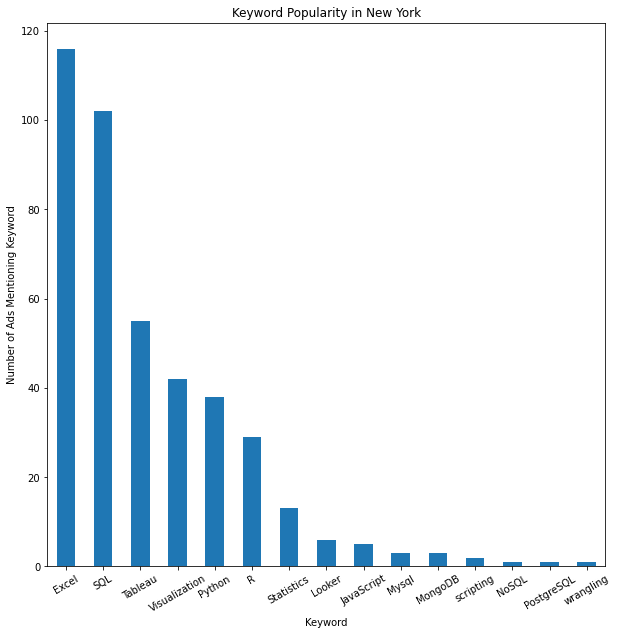

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# get individual keyword counts as percentage of ads mentioning the keyword
fig, ax = plt.subplots(1, 1,figsize=(10,10))
top_words_ny.plot.bar(x='Keyword', rot=30, ax=ax, legend=False)
ax.set_ylabel('Number of Ads Mentioning Keyword')
ax.set_title('Keyword Popularity in New York');